In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from flask import Flask, request, jsonify

# Data Collecting

In [ ]:
sample_submission_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/house-prices-advanced-regression-techniques%20(1)/sample_submission.csv')
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/house-prices-advanced-regression-techniques%20(1)/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/house-prices-advanced-regression-techniques%20(1)/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning & Transformation

## Train_df

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
missing_values = train_df.isnull().sum()
missing_values[missing_values>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
less = missing_values[missing_values<1000].index
over = missing_values[missing_values>=1000].index

In [ ]:
numeric_features = train_df[less].select_dtypes(include=['number']).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())

In [ ]:
kategorical_features = train_df[less].select_dtypes(include=['object']).columns
for column in kategorical_features:
  train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

In [ ]:
df = train_df.drop(columns=over)

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0


<ipython-input-13-f2040cf70348>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


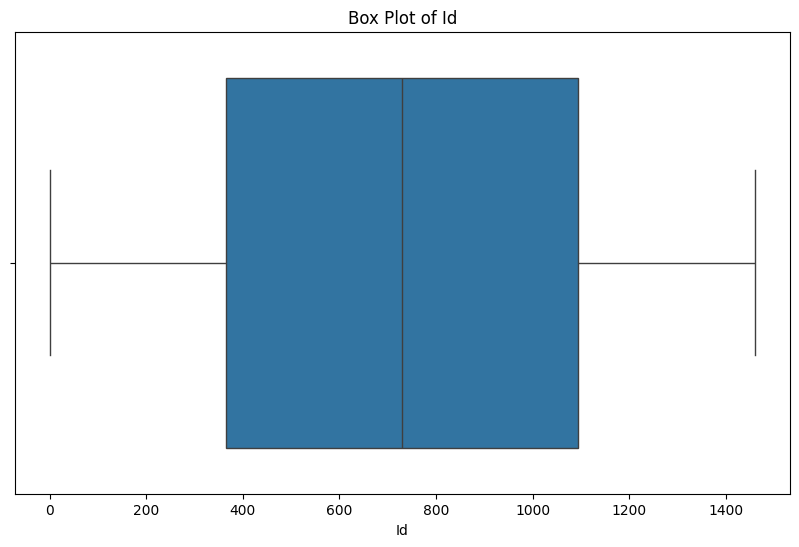

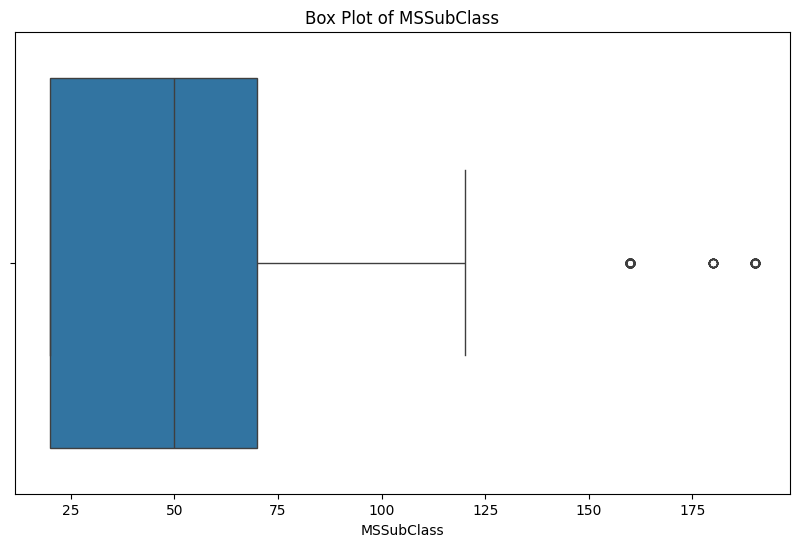

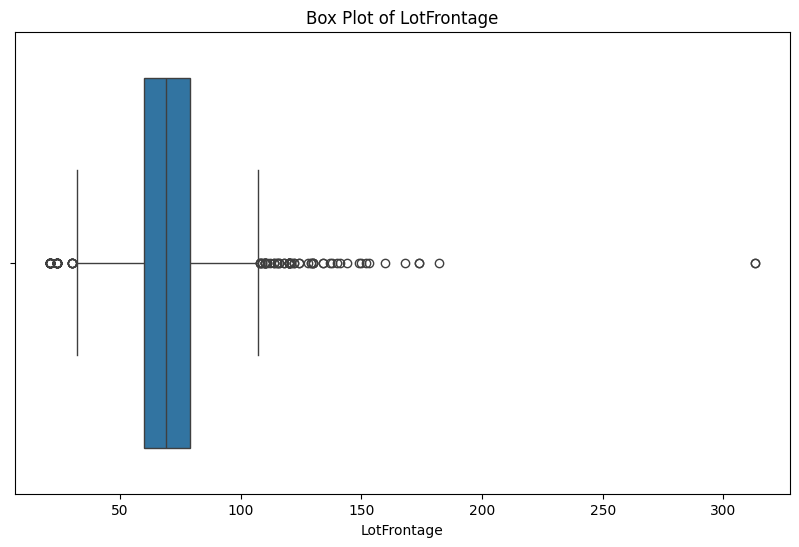

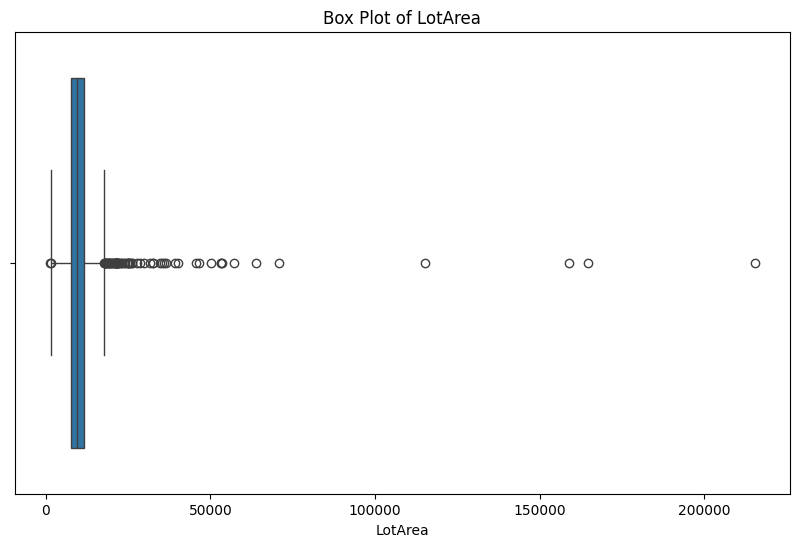

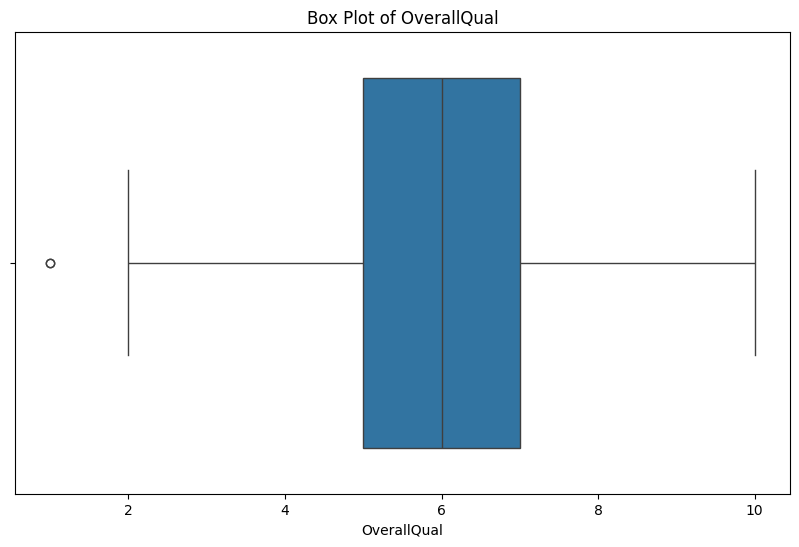

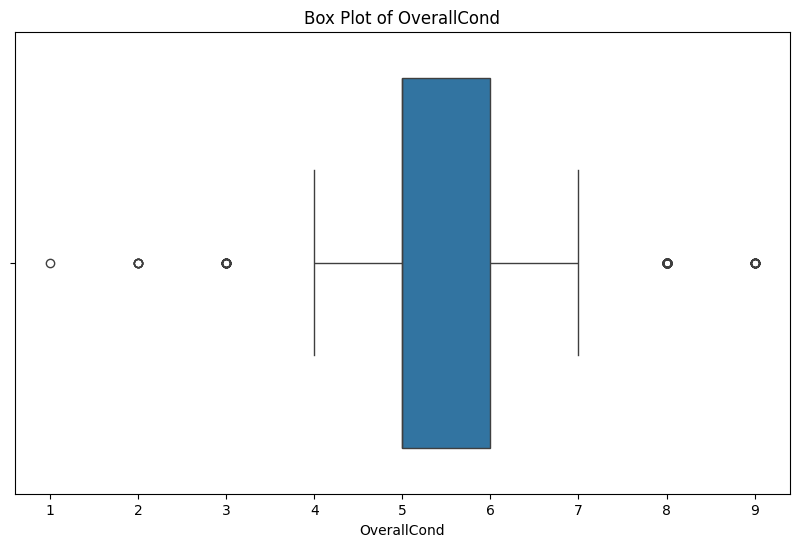

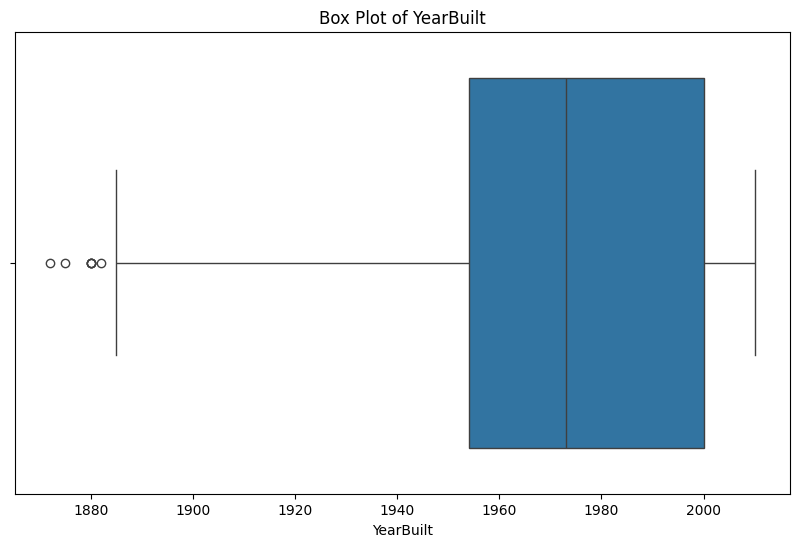

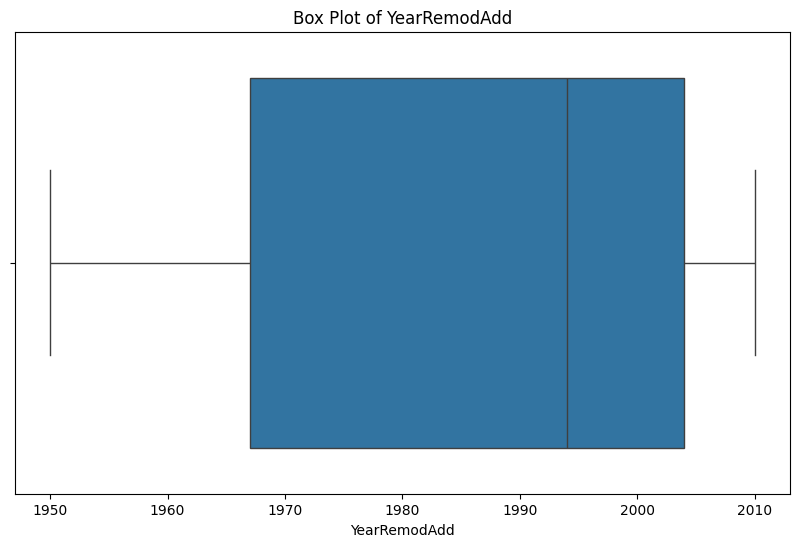

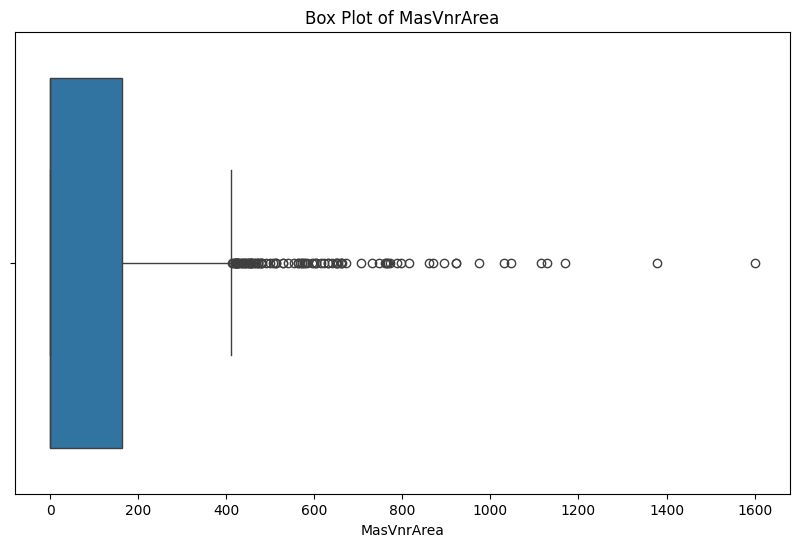

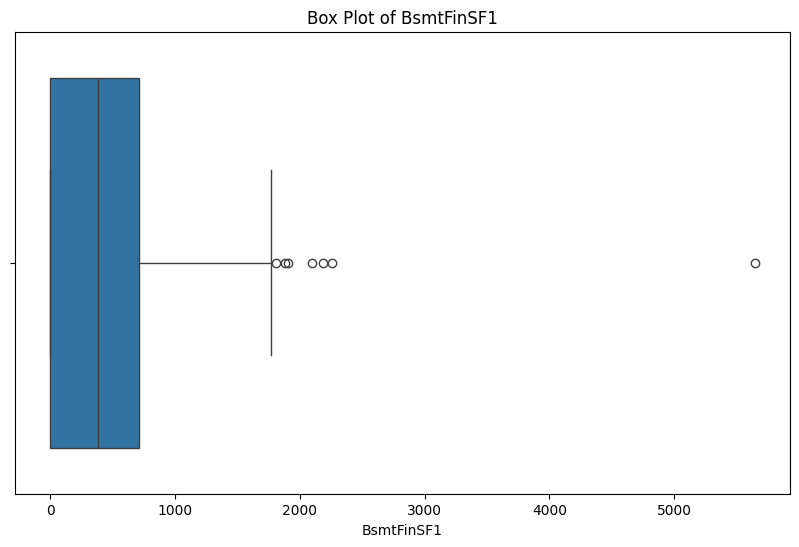

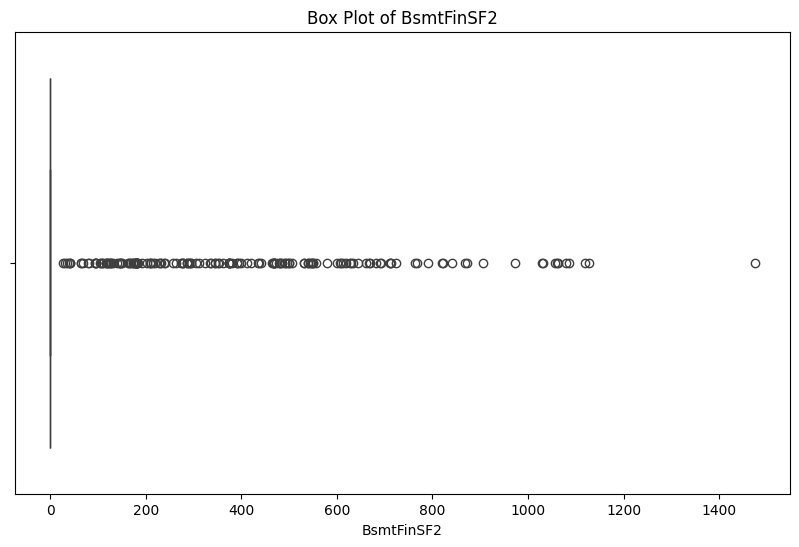

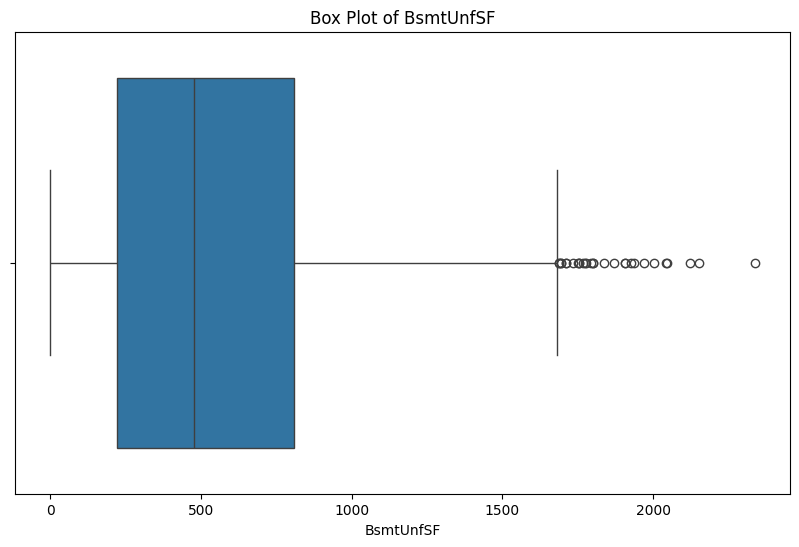

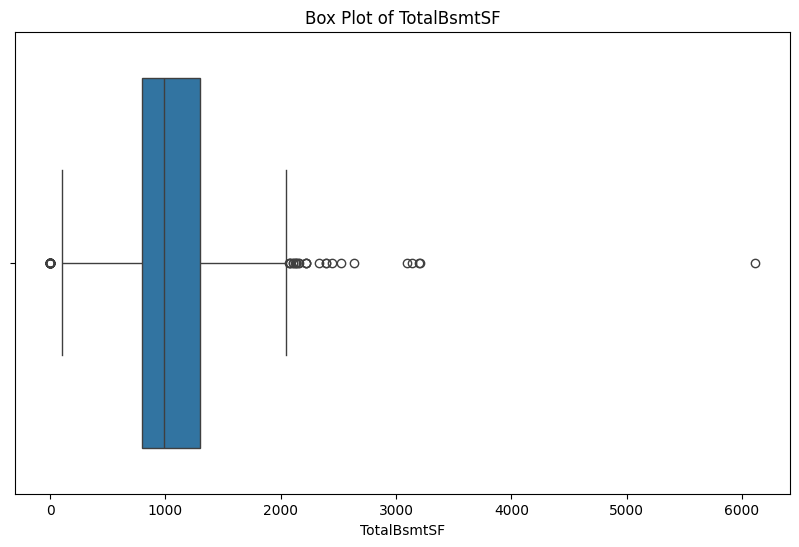

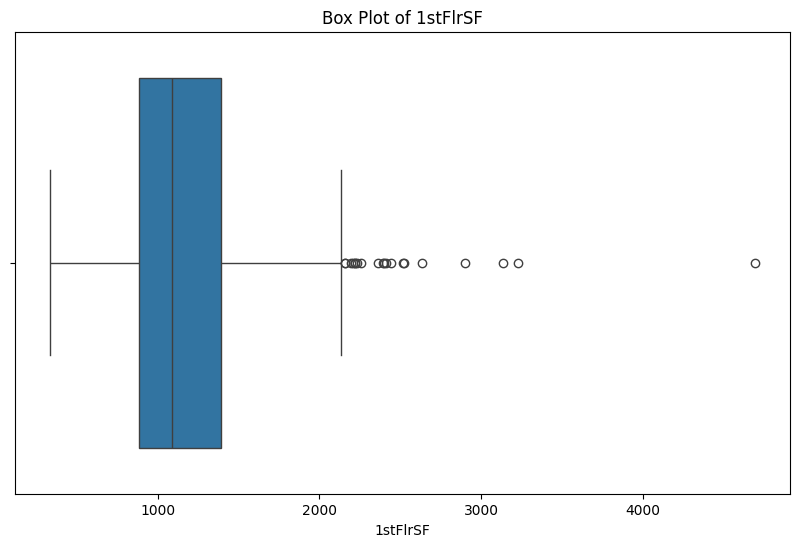

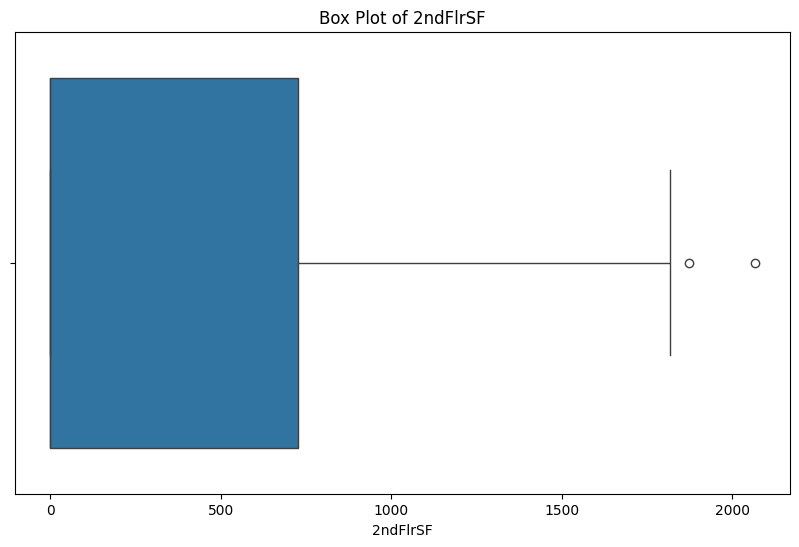

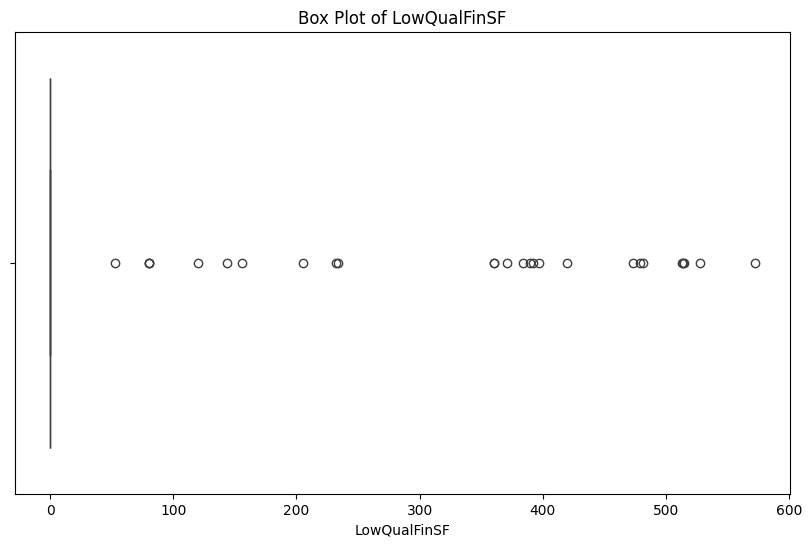

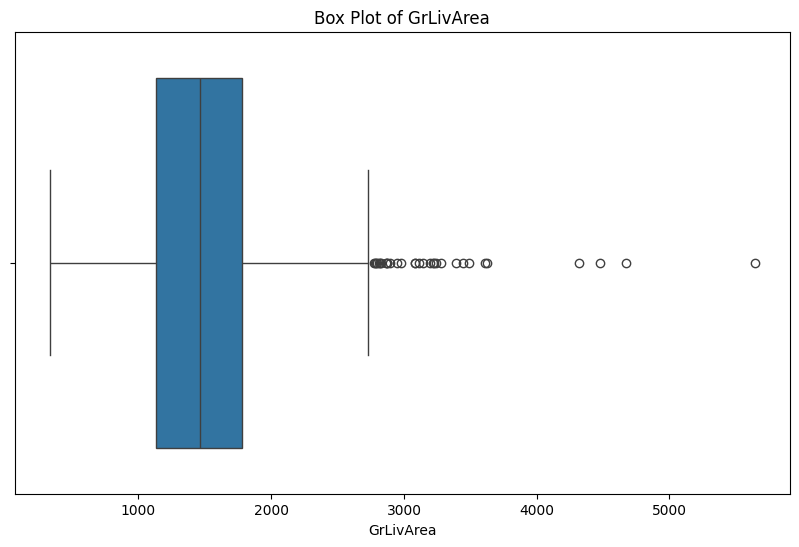

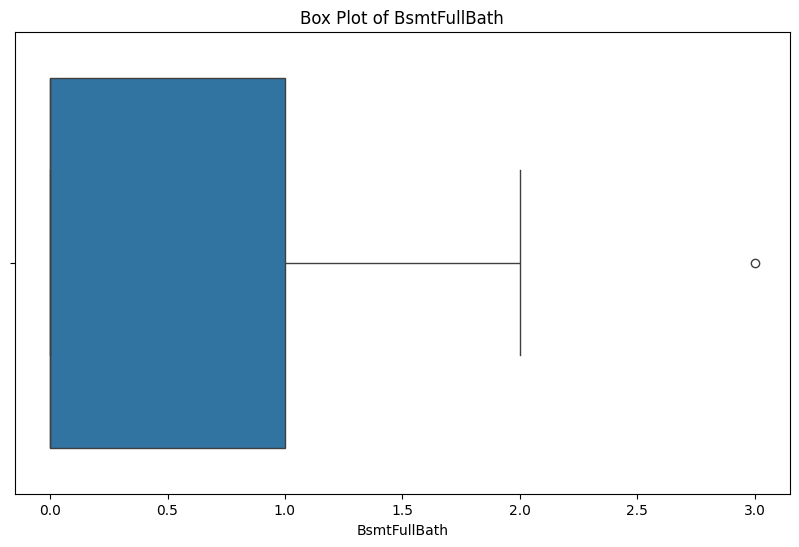

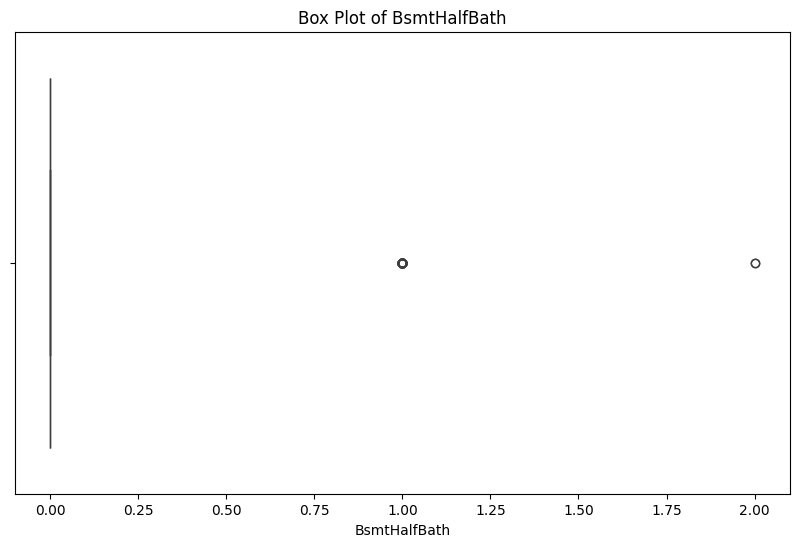

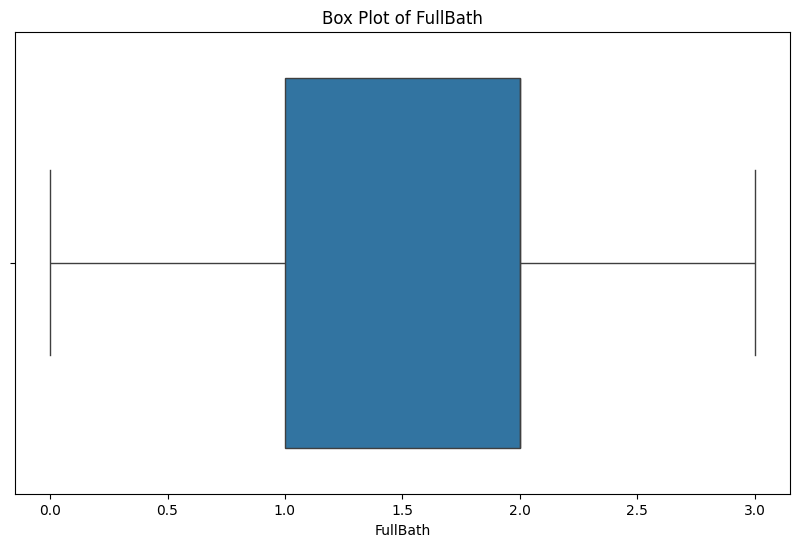

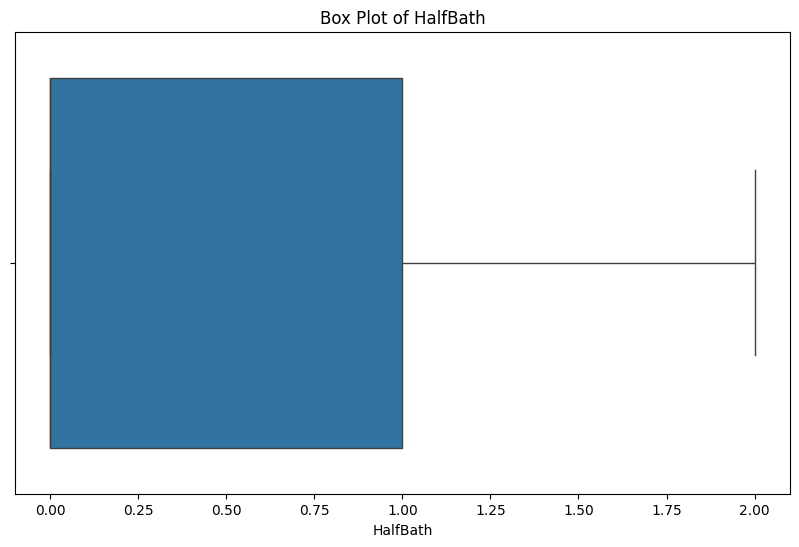

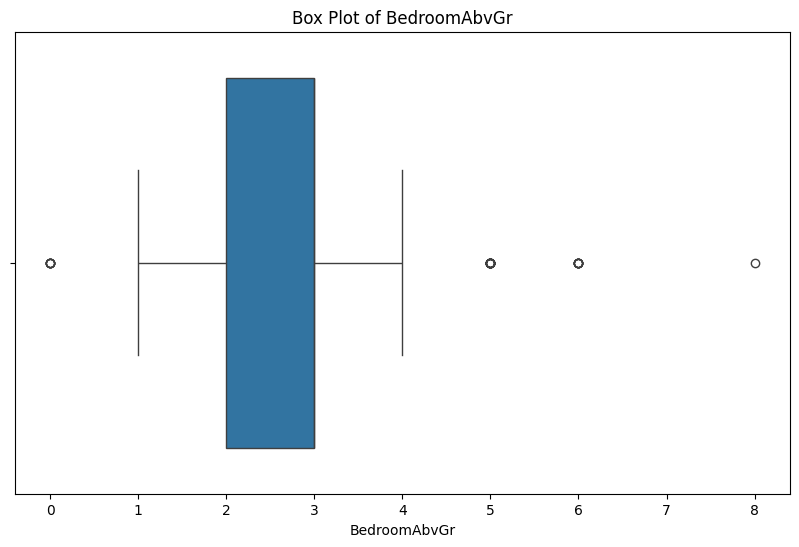

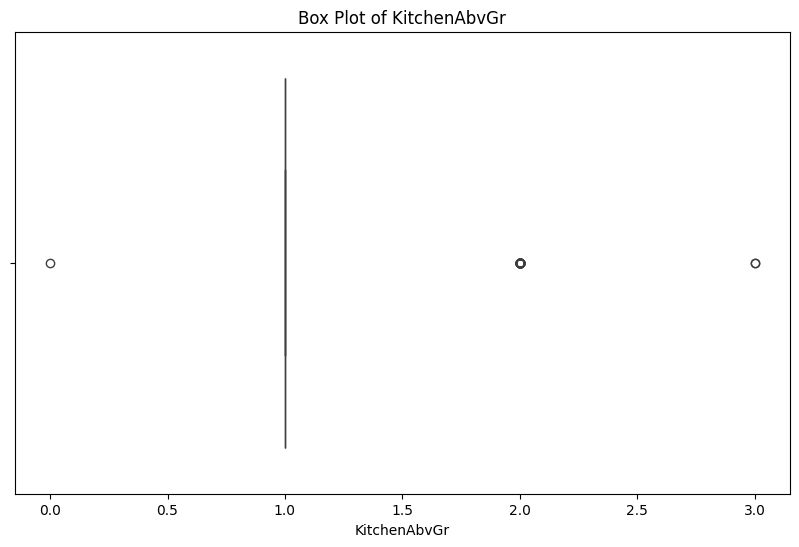

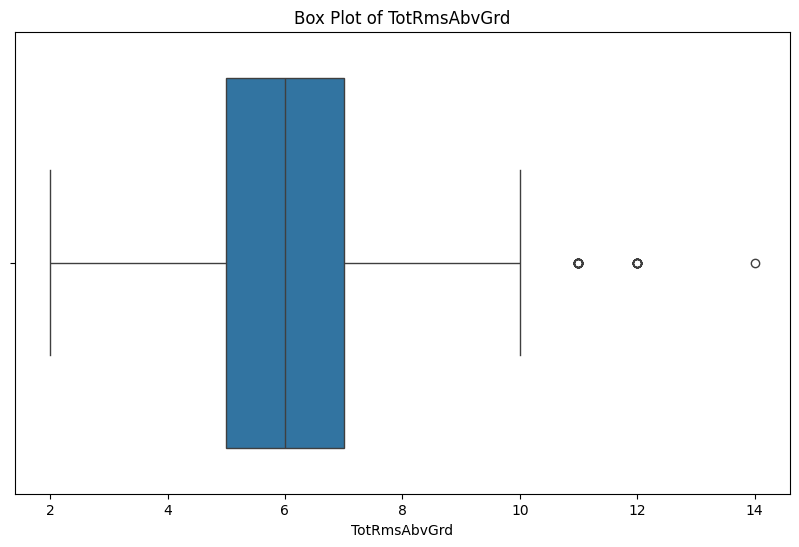

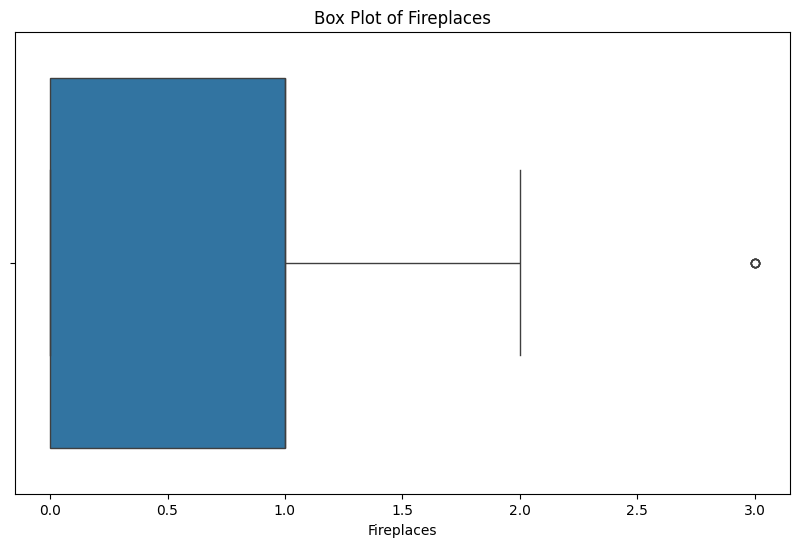

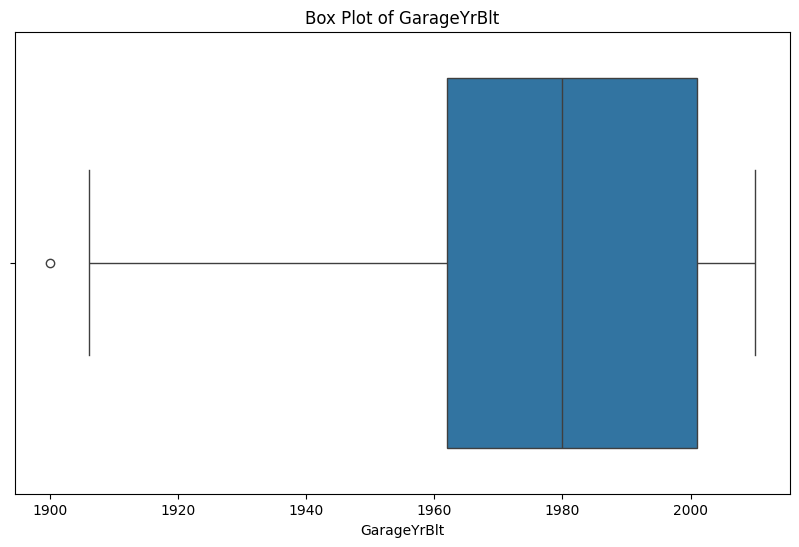

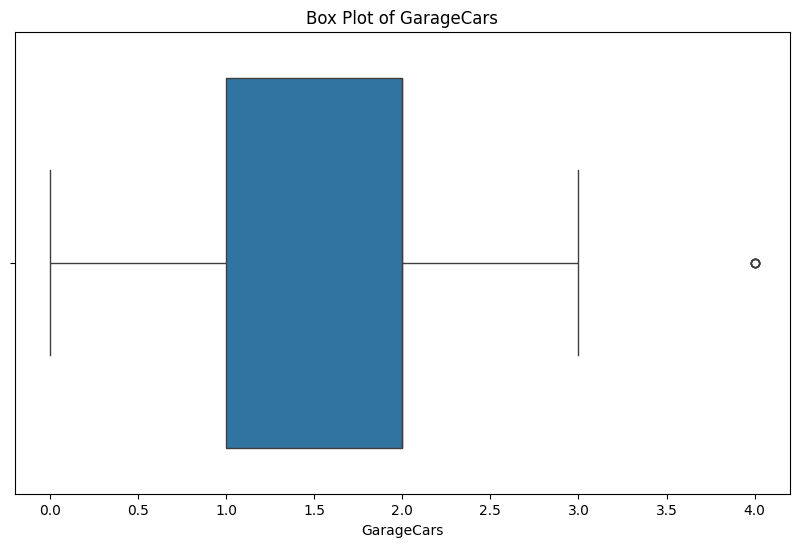

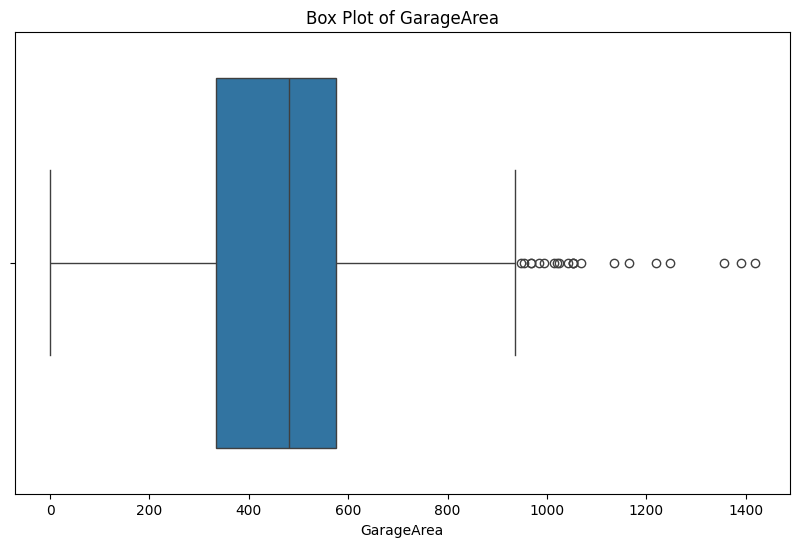

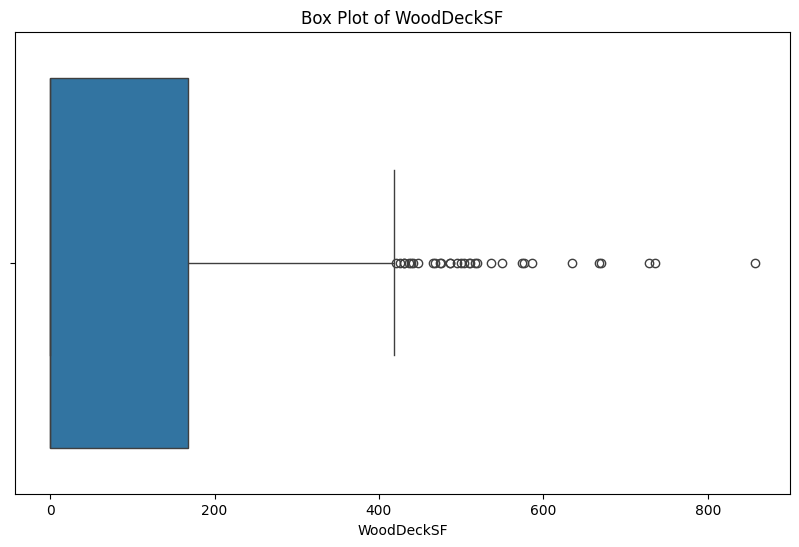

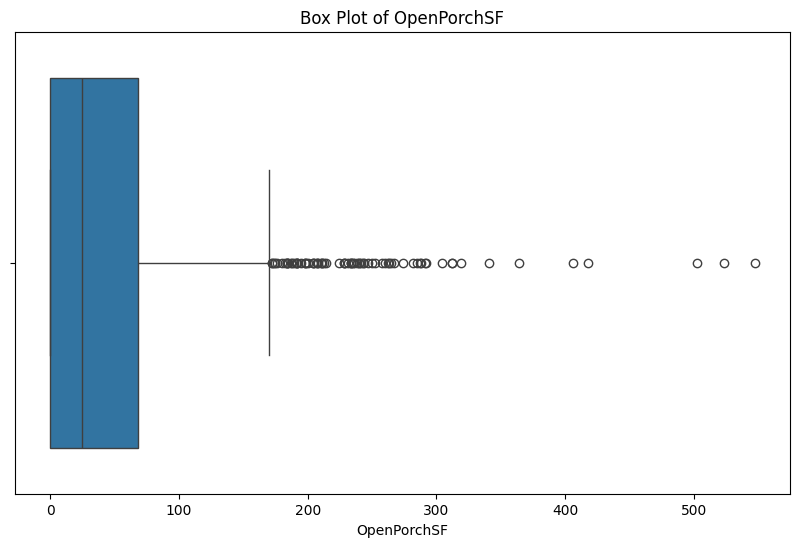

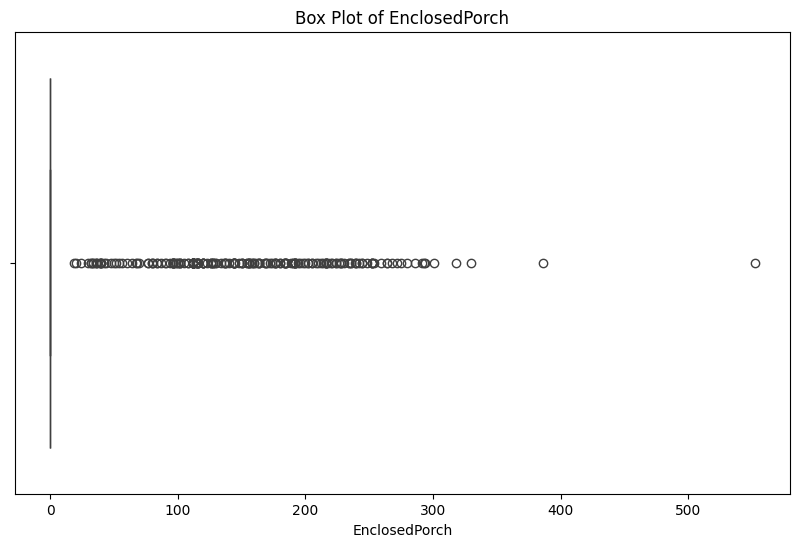

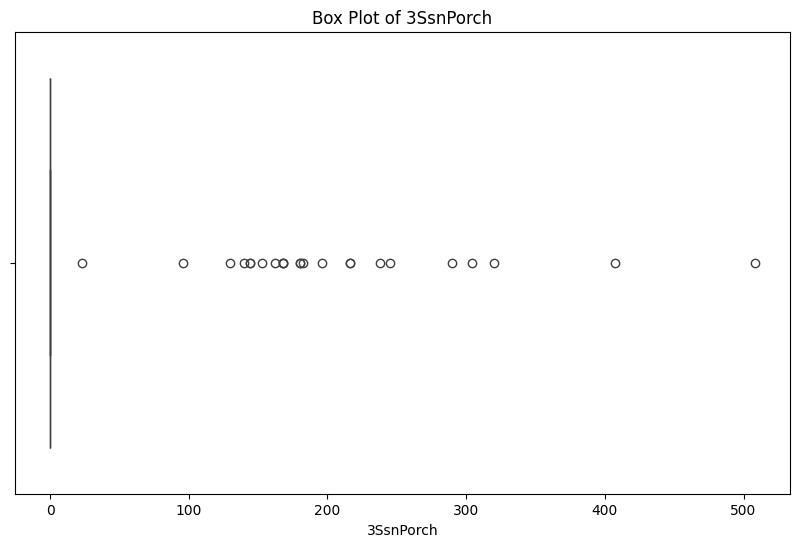

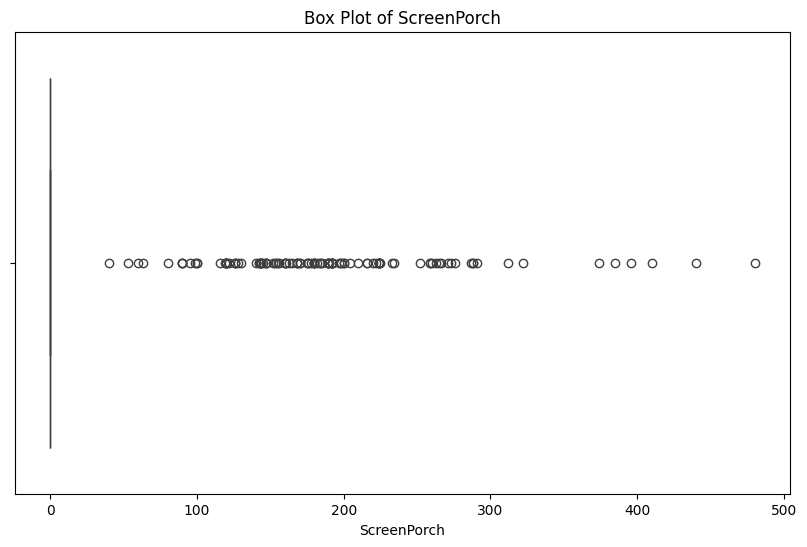

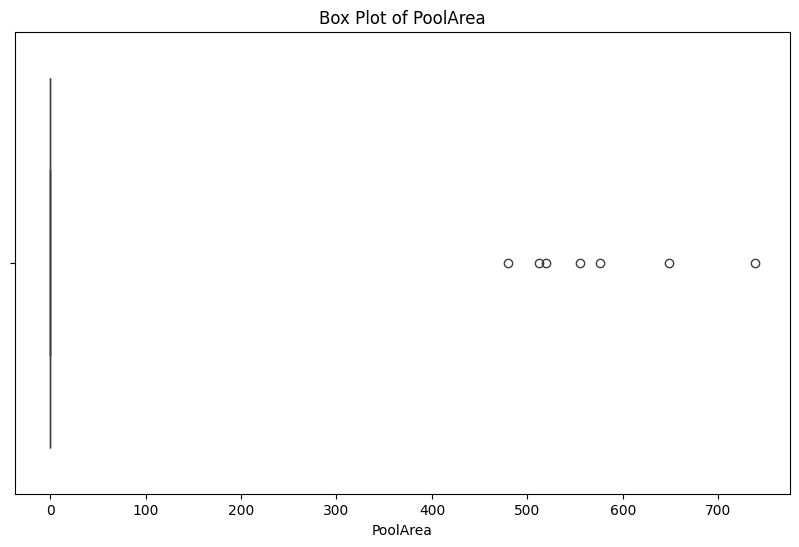

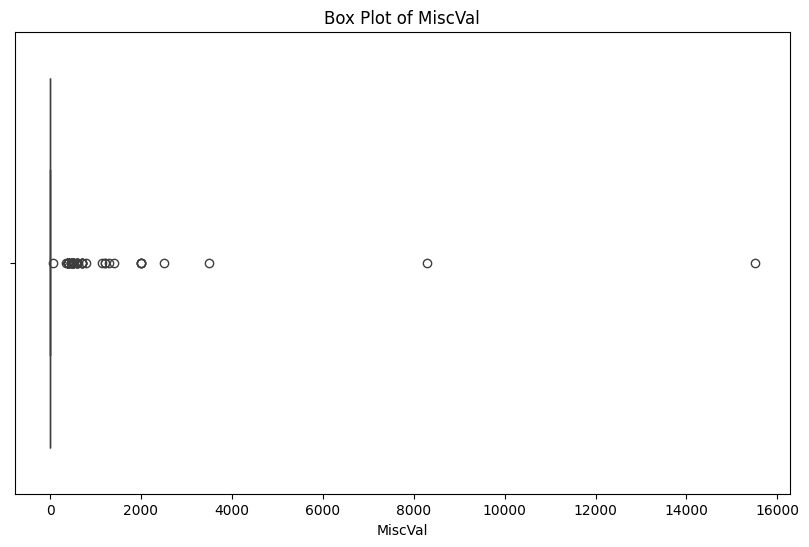

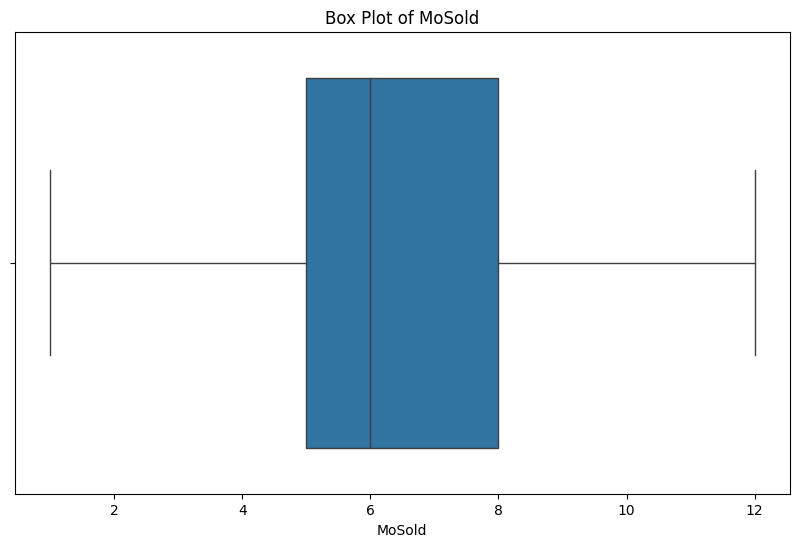

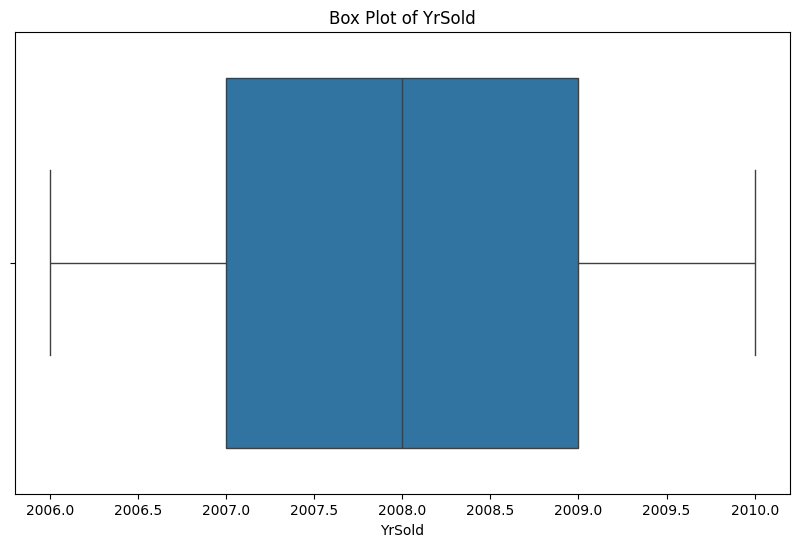

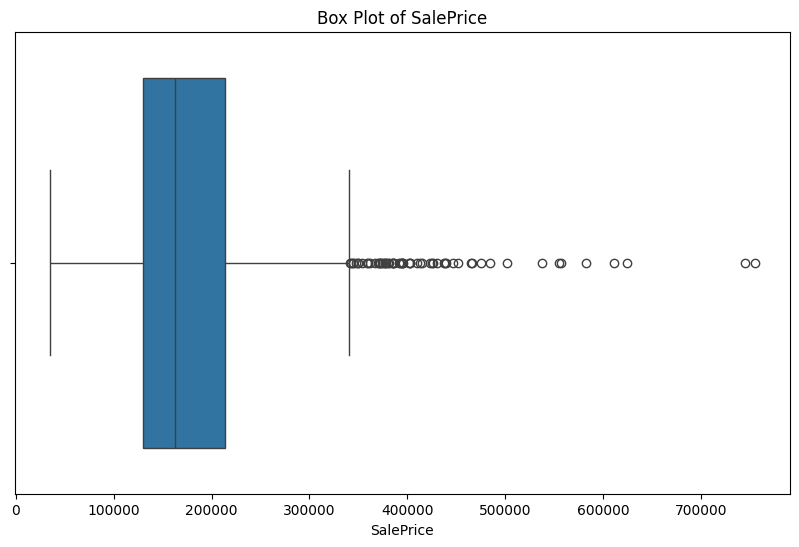

In [ ]:
for feature in numeric_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show

In [ ]:
q1 = df[numeric_features].quantile(0.25)
q3 = df[numeric_features].quantile(0.75)
IQR = q3 - q1

In [ ]:
condition = ~((df[numeric_features] < (q1 - 1.5 * IQR)) | (df[numeric_features] > (q3 + 1.5 *IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

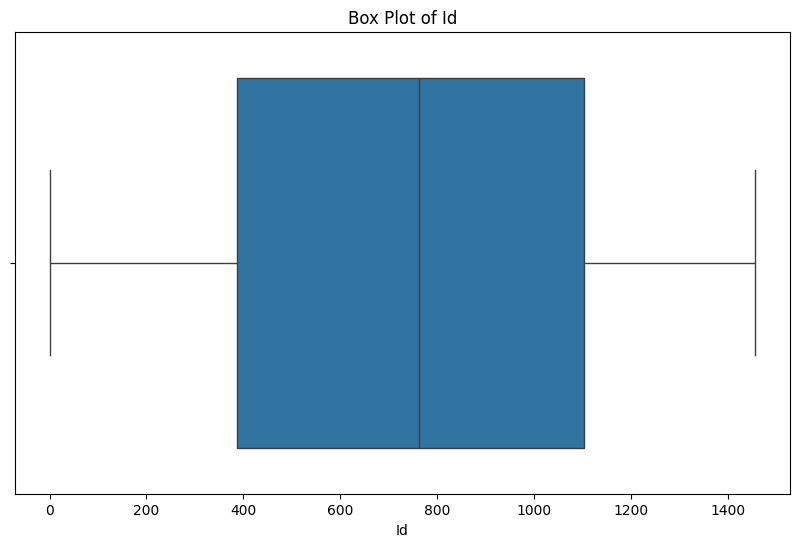

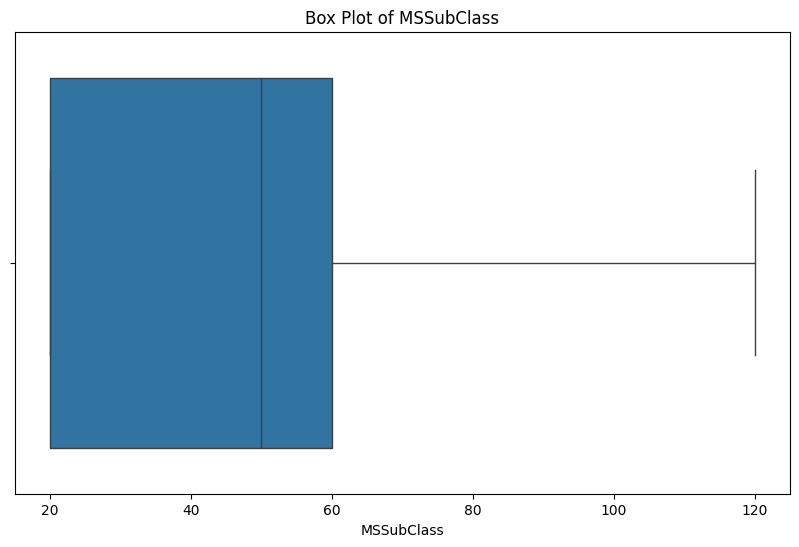

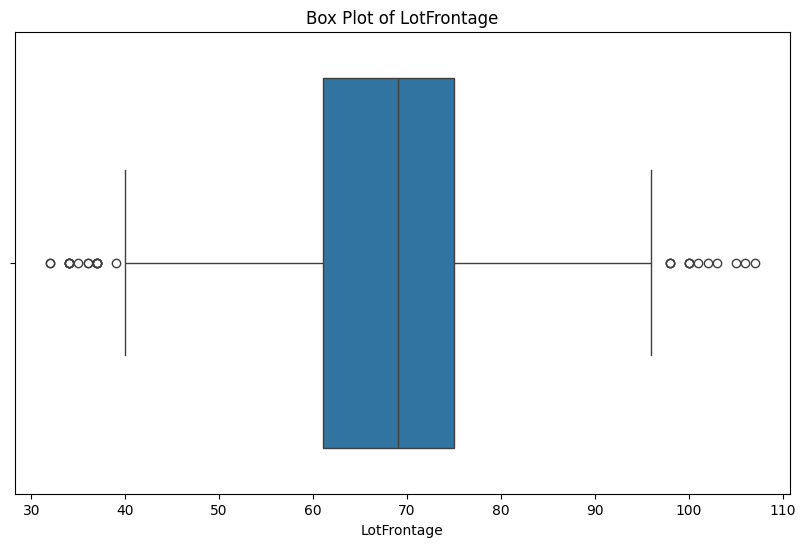

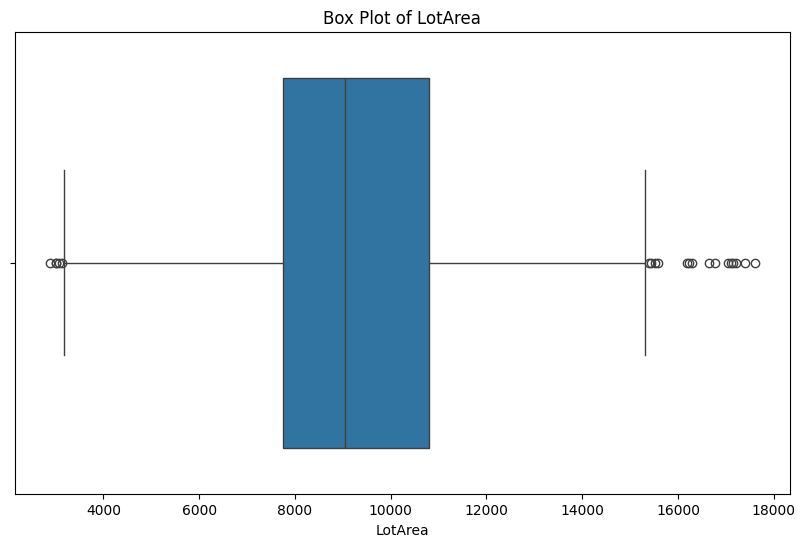

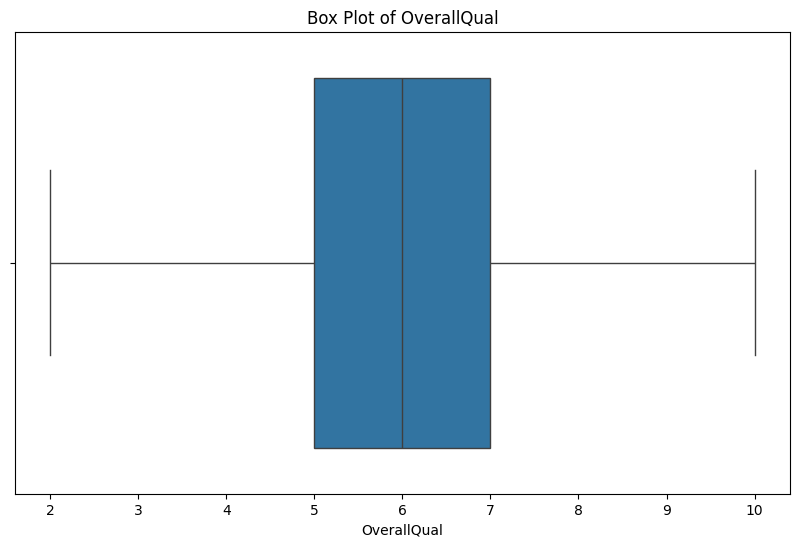

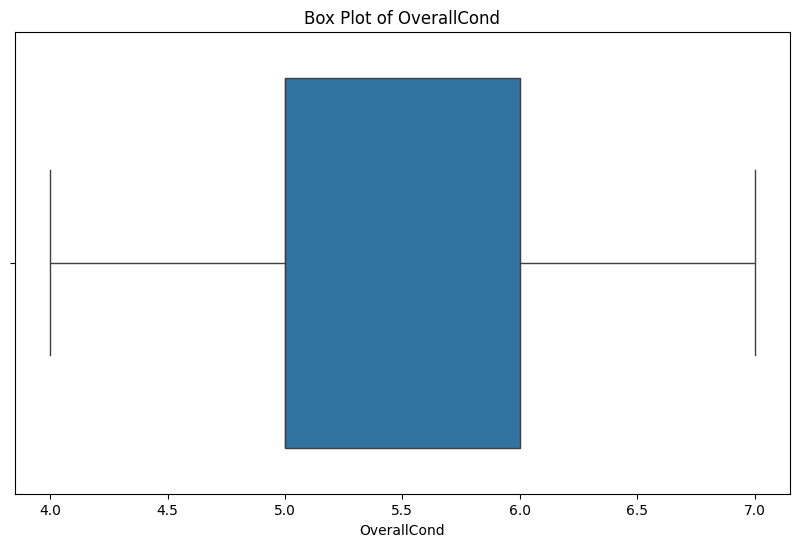

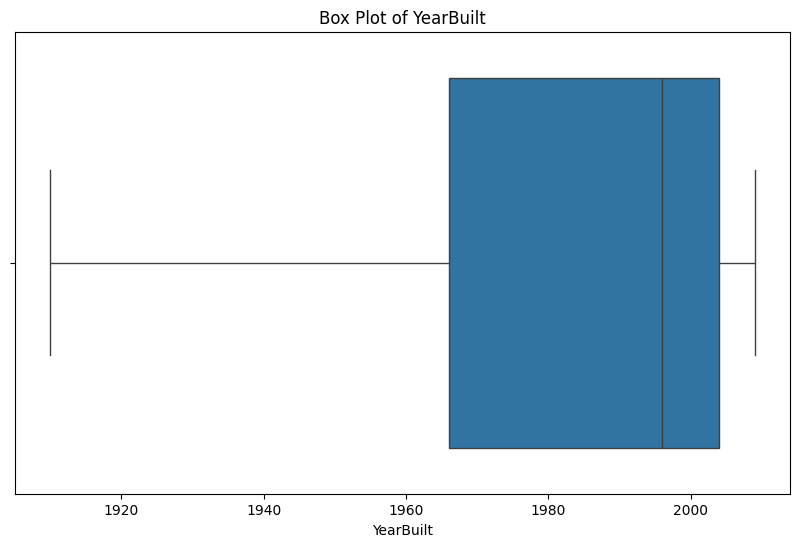

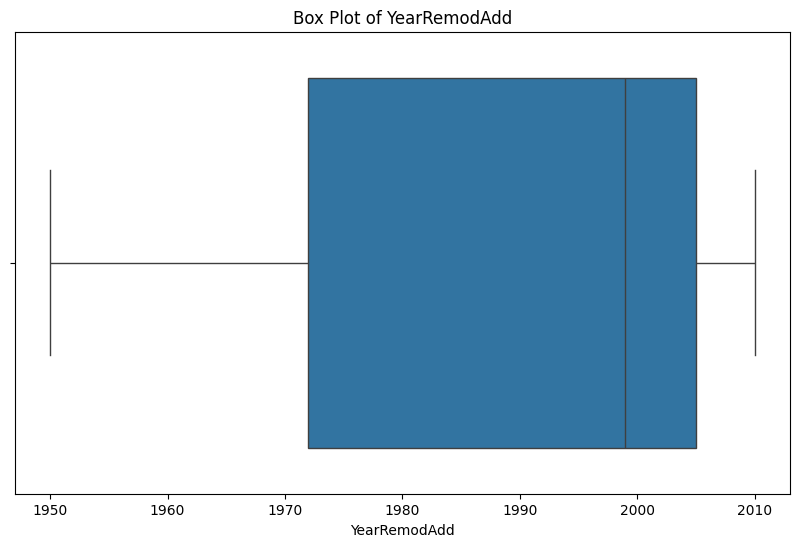

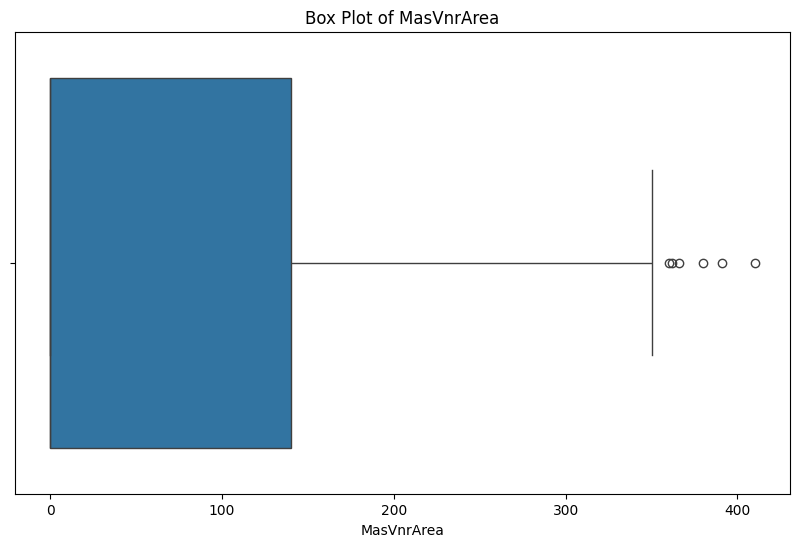

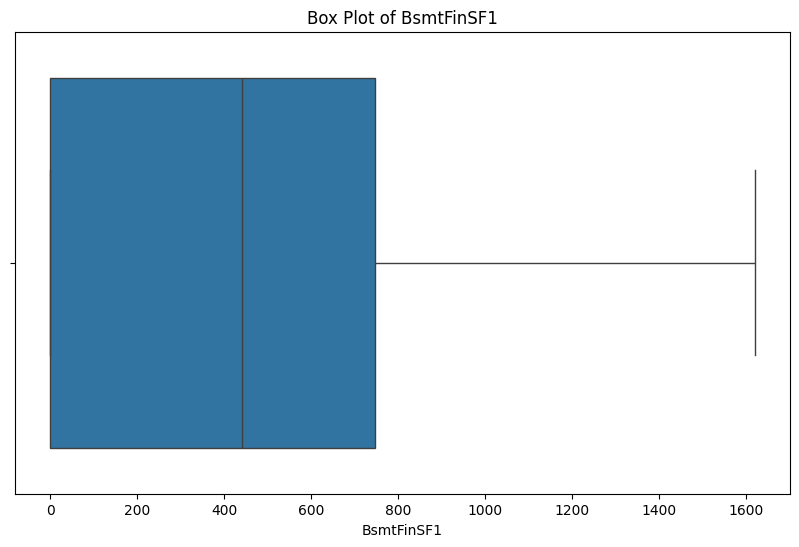

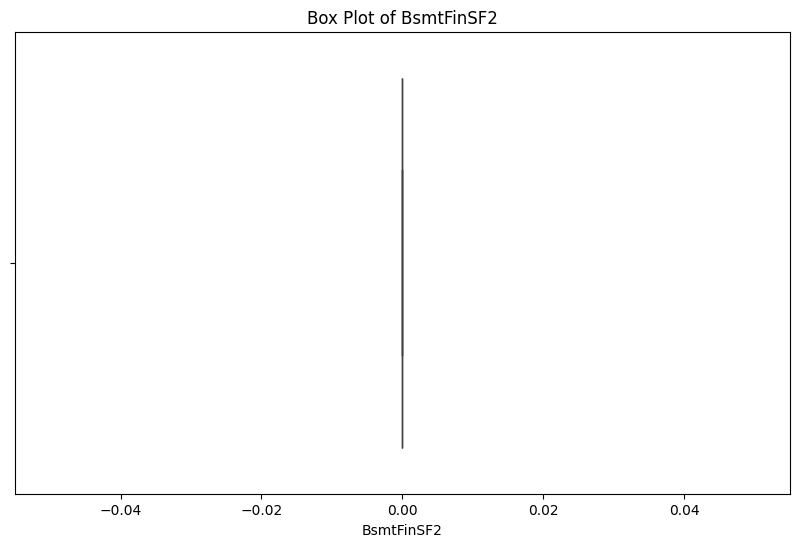

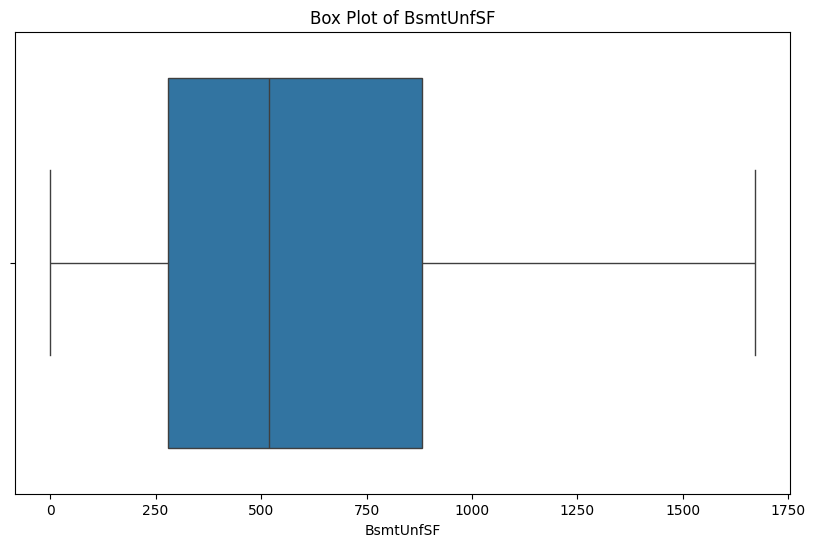

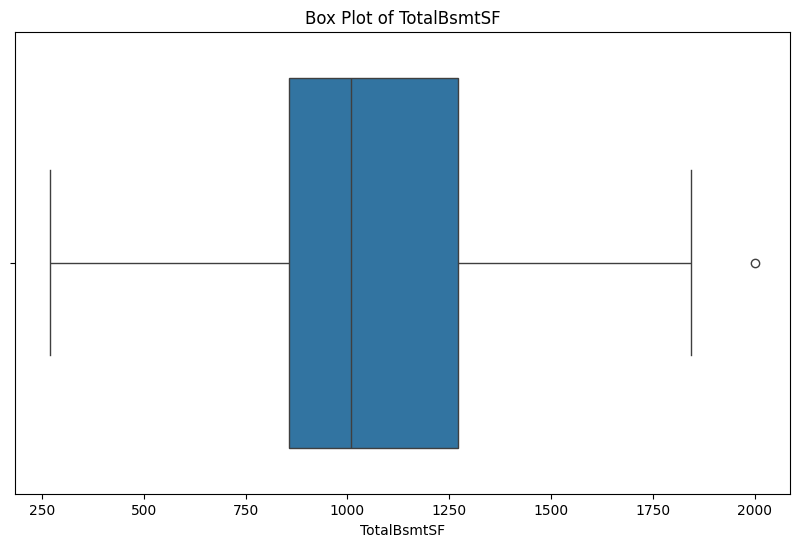

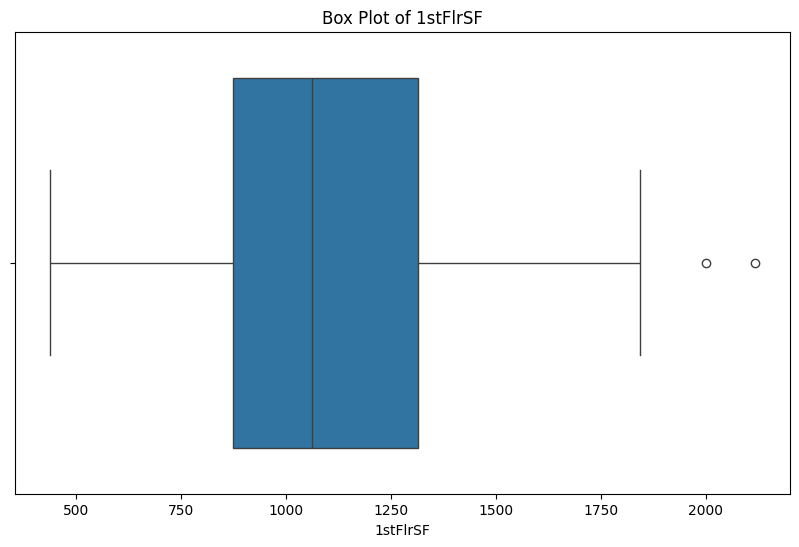

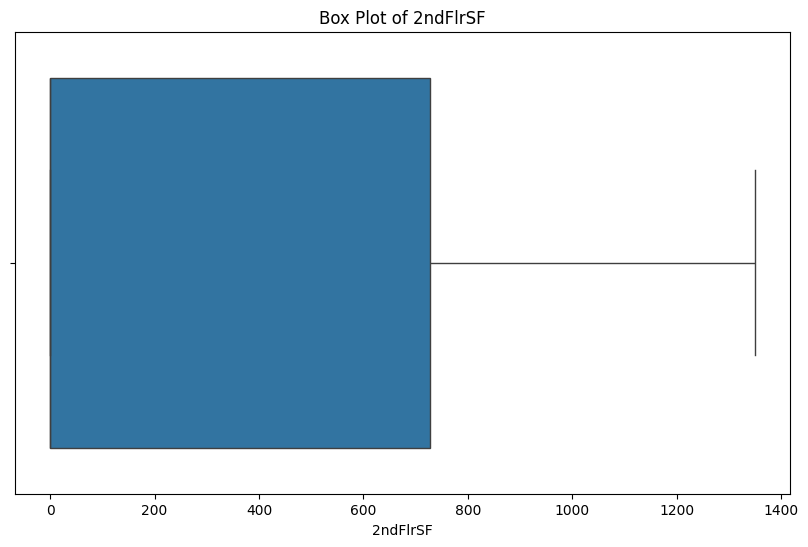

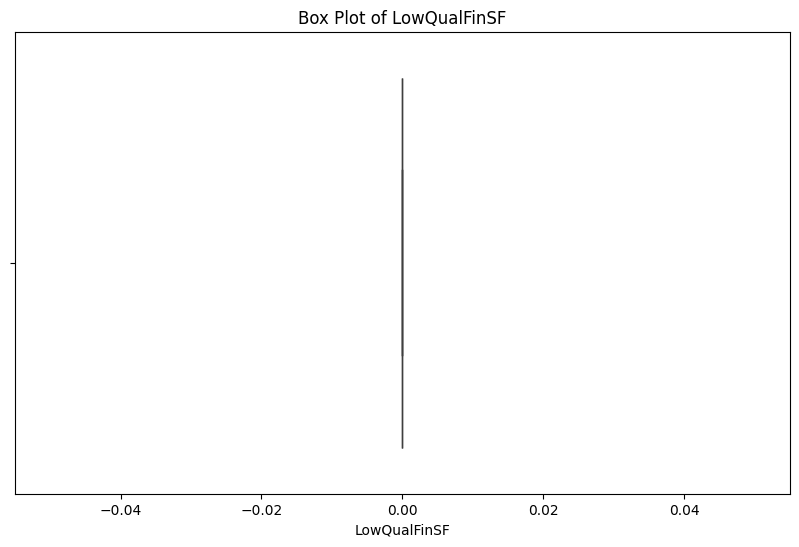

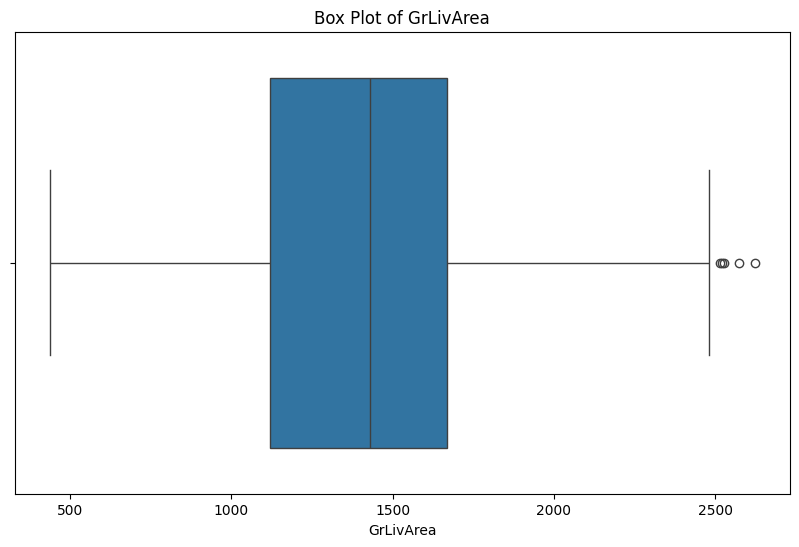

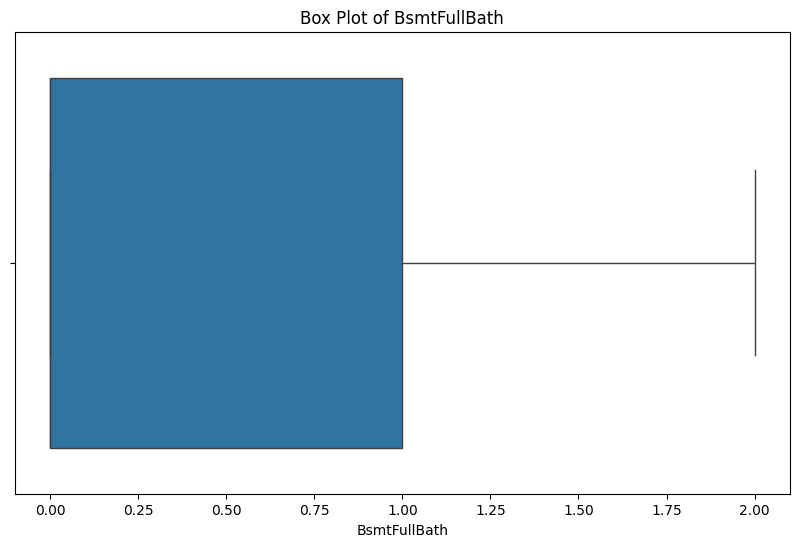

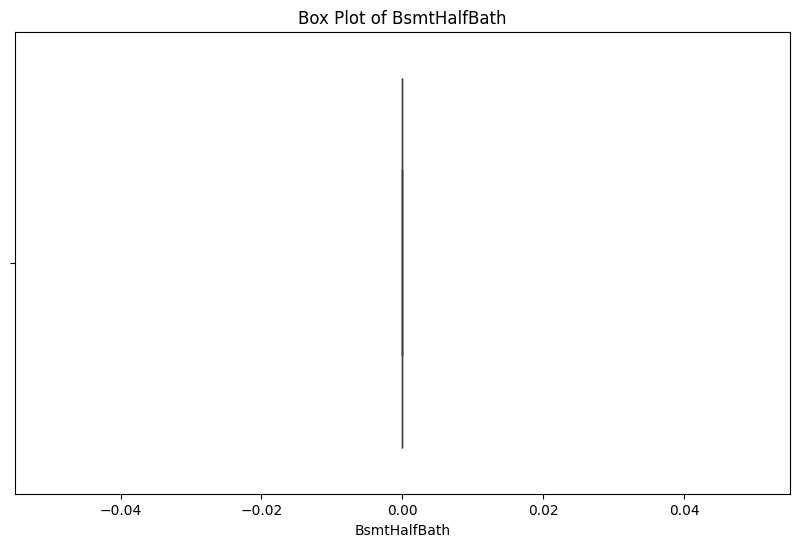

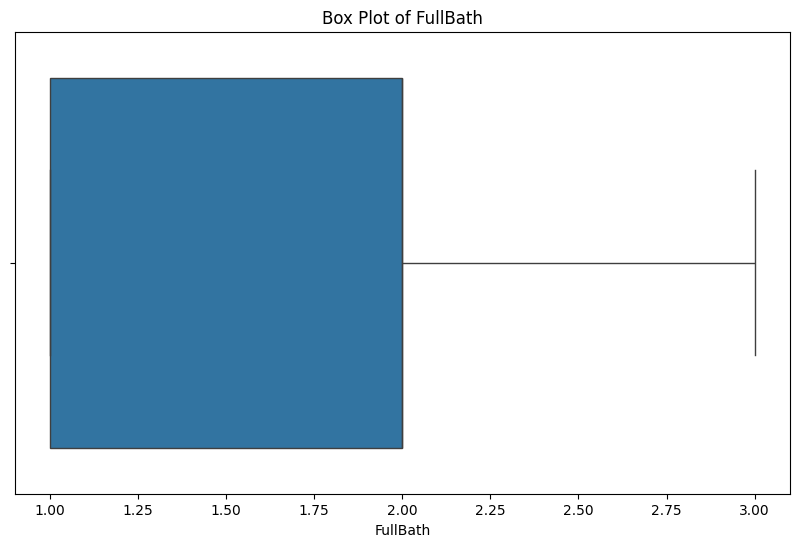

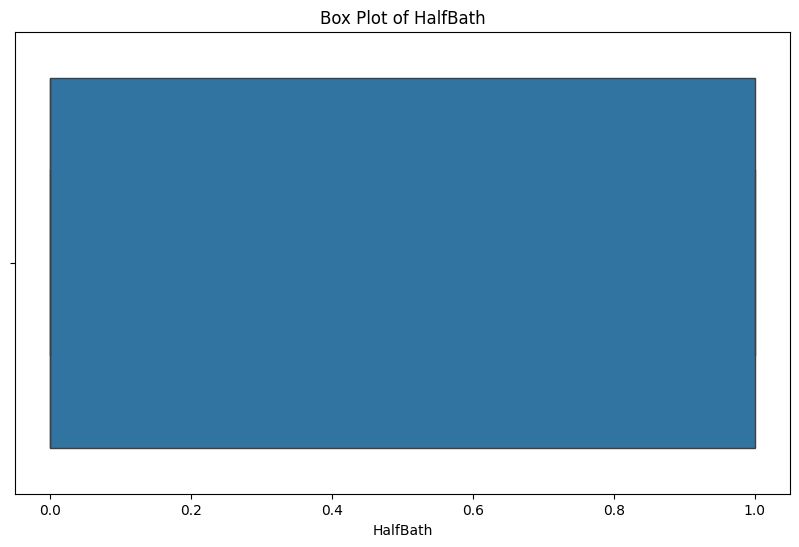

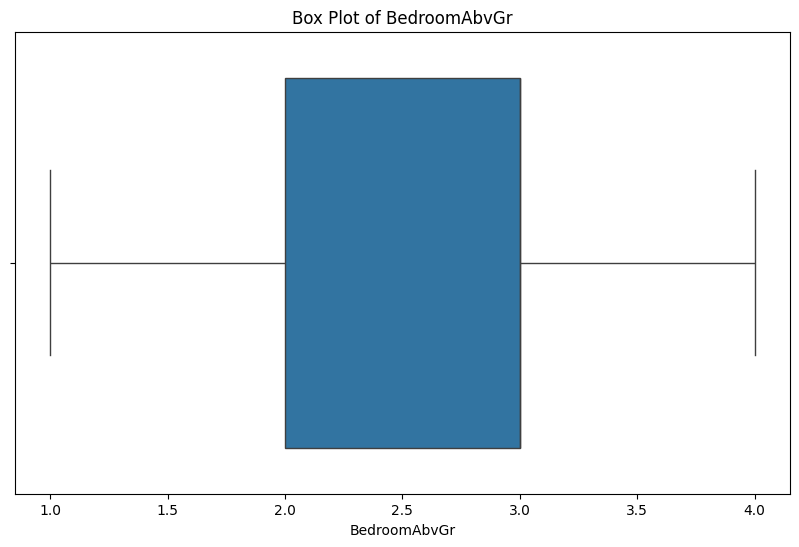

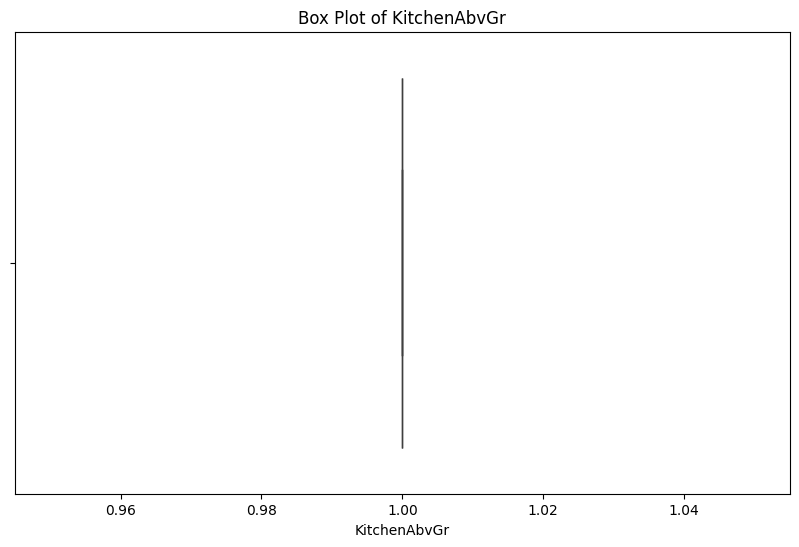

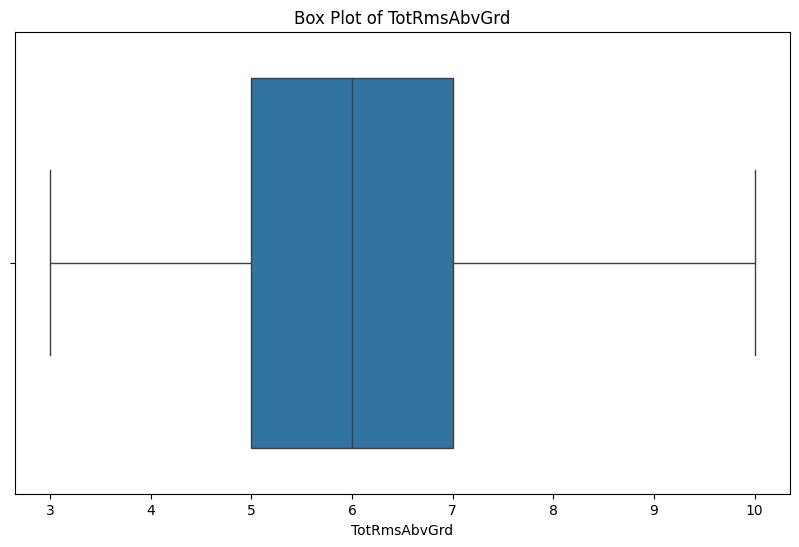

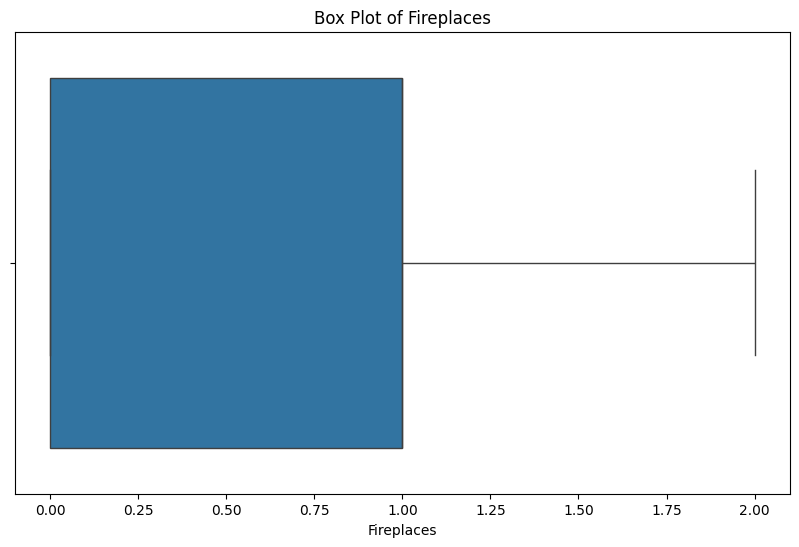

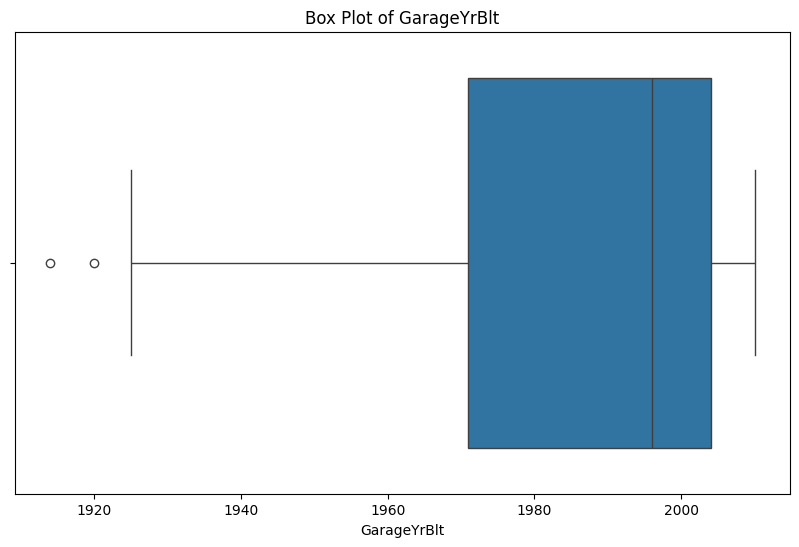

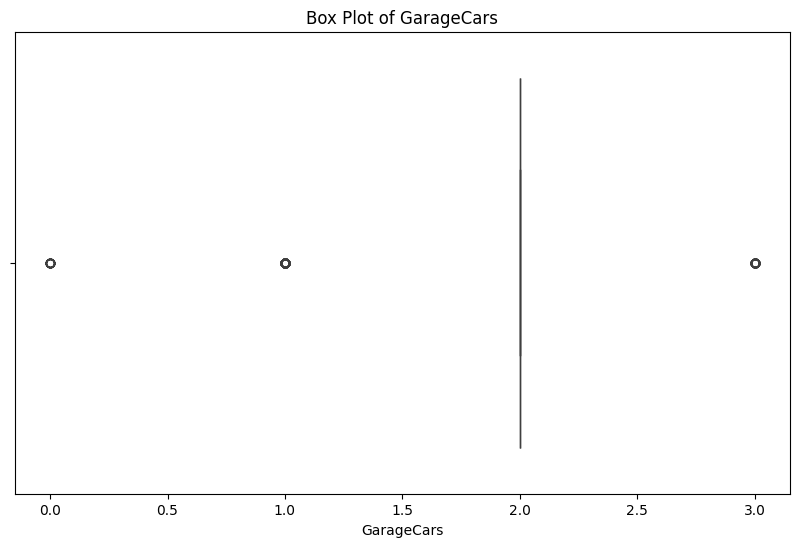

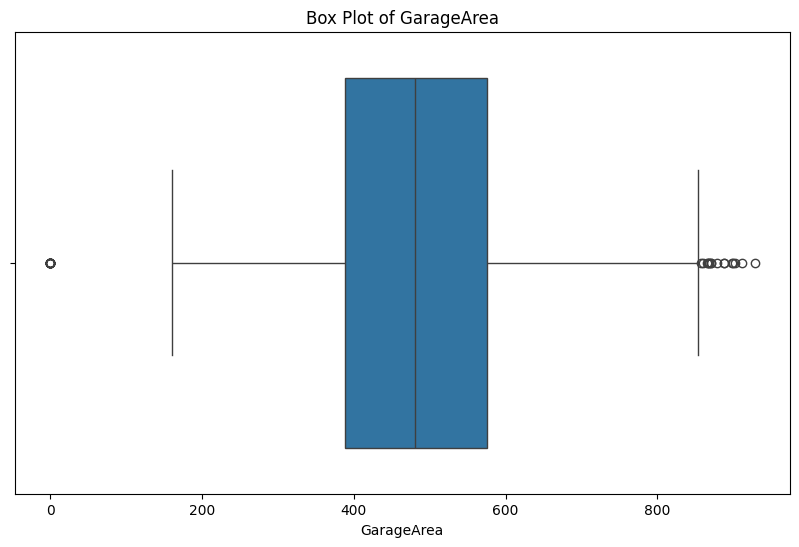

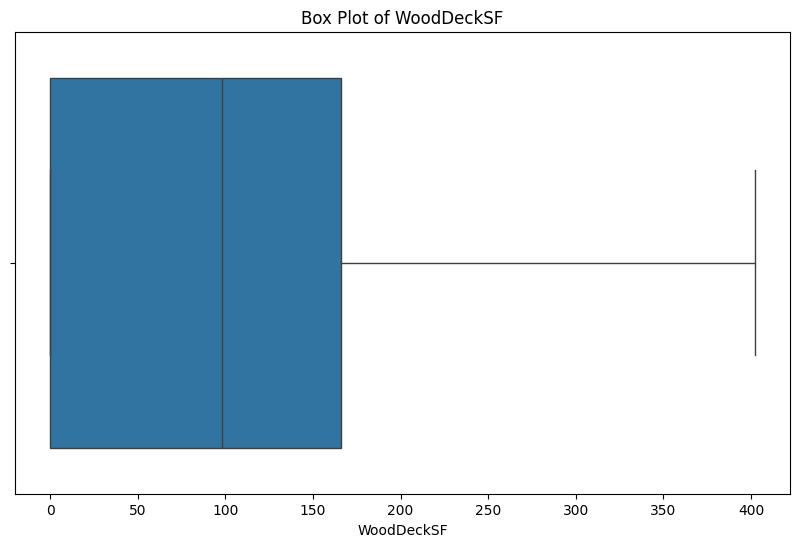

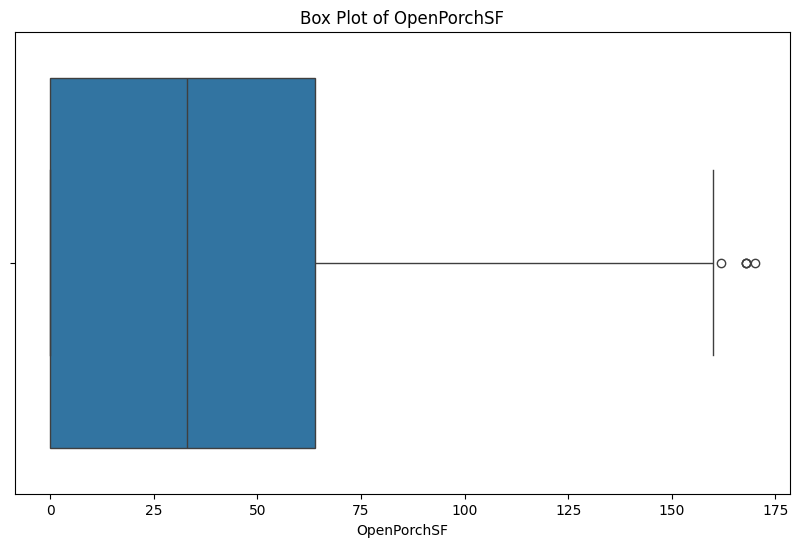

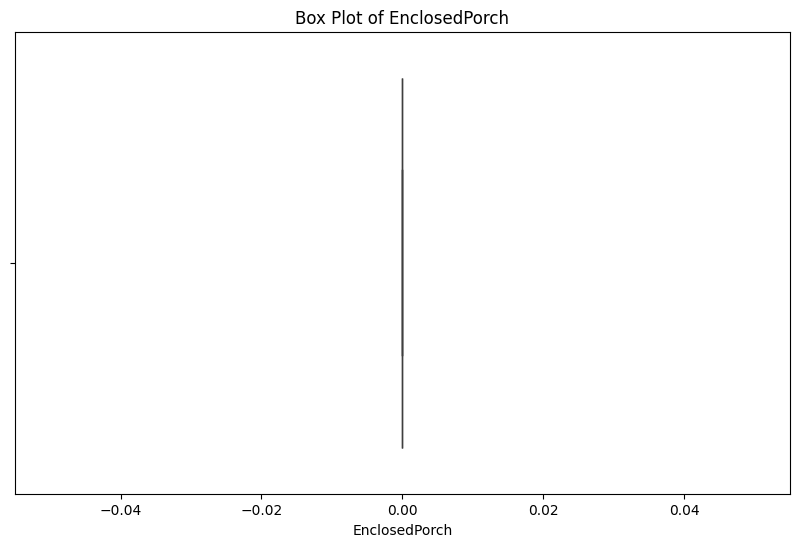

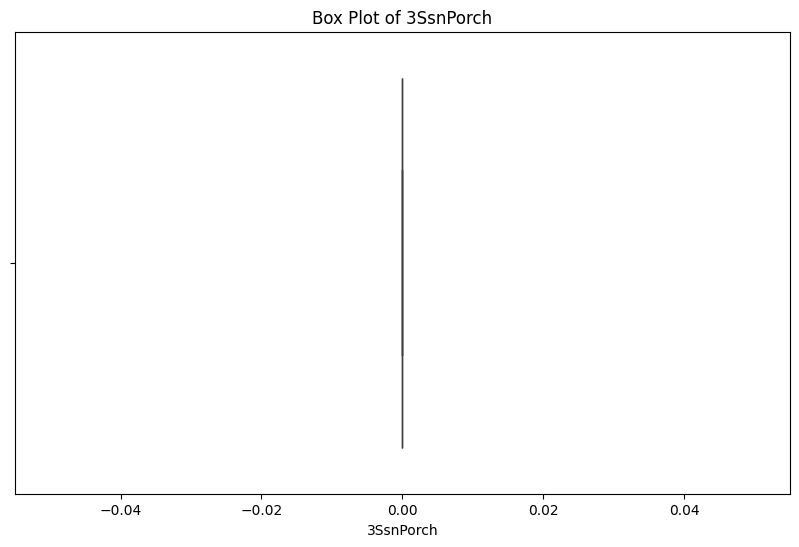

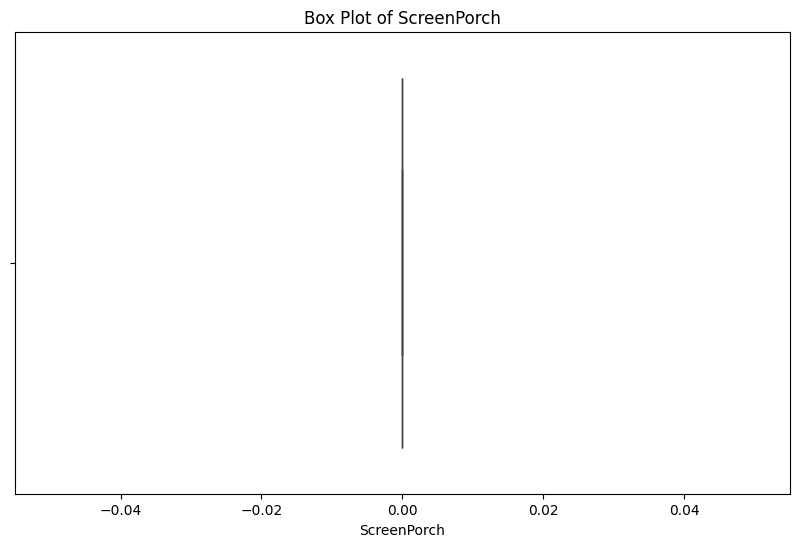

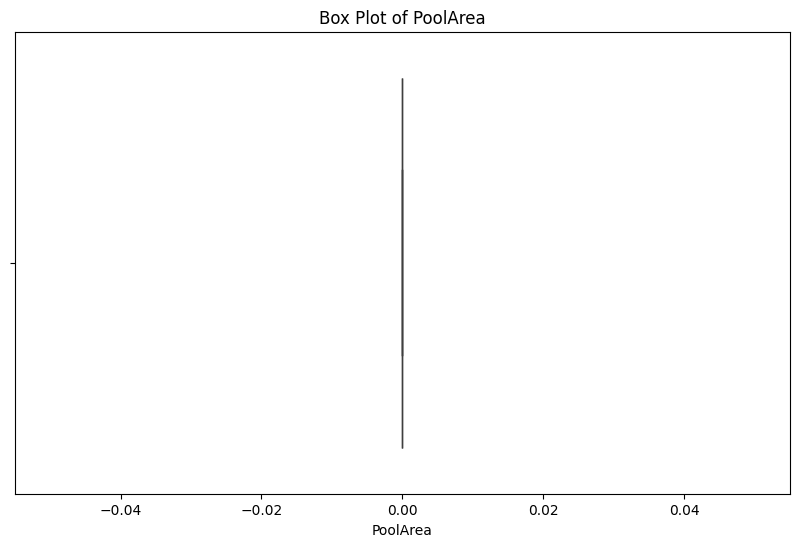

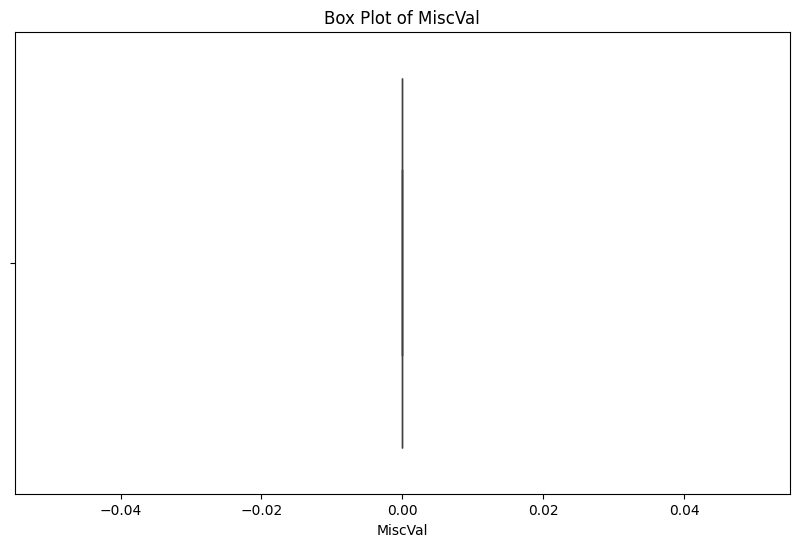

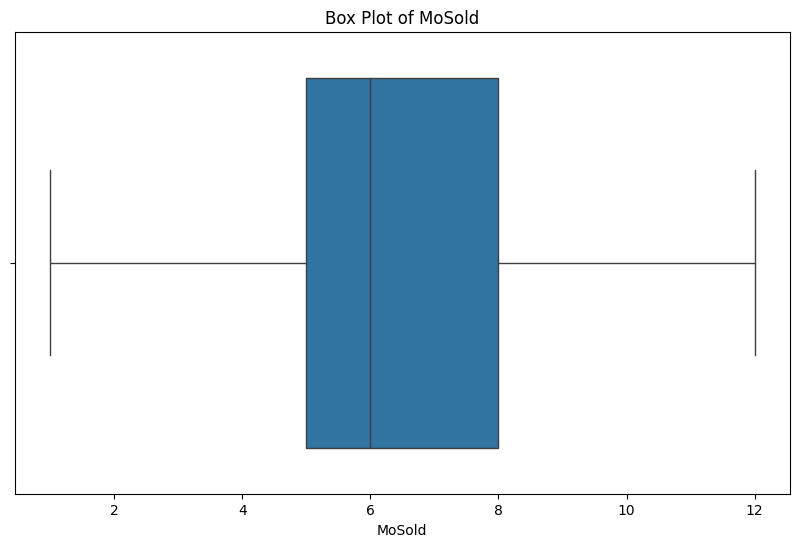

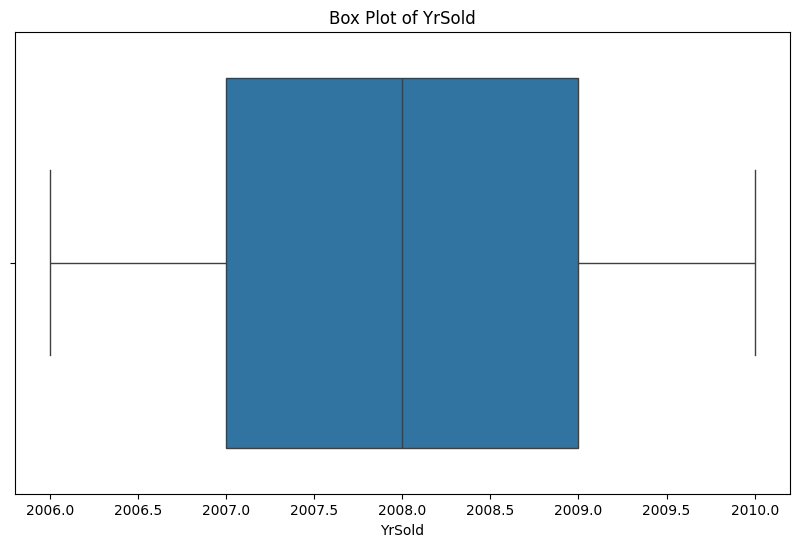

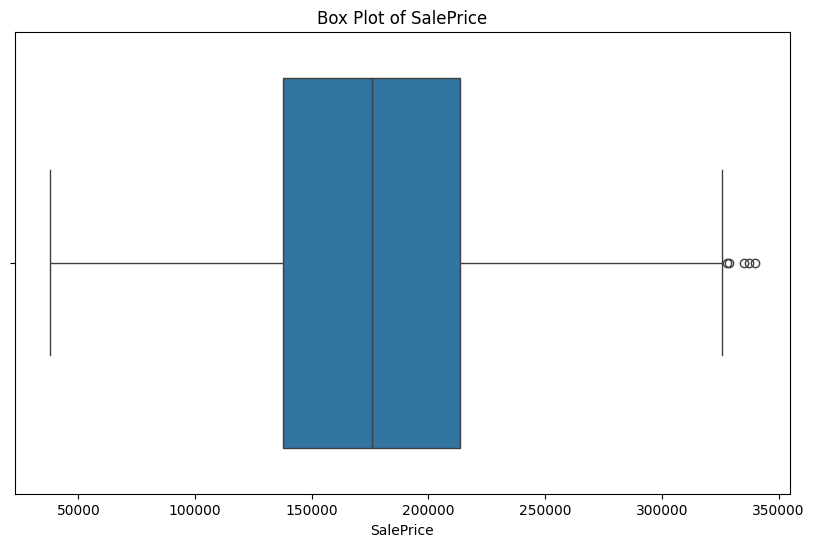

In [ ]:
for features in numeric_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[features])
  plt.title(f'Box Plot of {features}')
  plt.show()

In [ ]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Sebelu Standardilisasi')

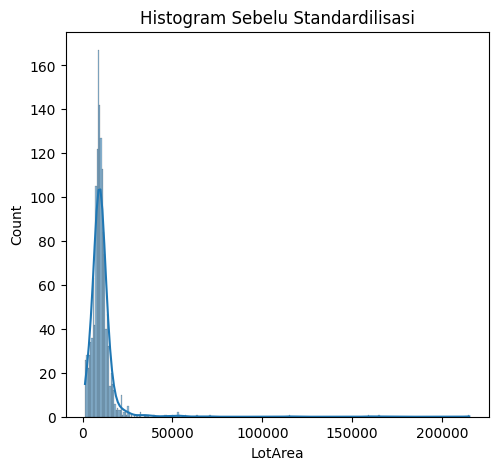

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train_df[numeric_features[3]], kde=True)
plt.title("Histogram Sebelu Standardilisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardilisasi')

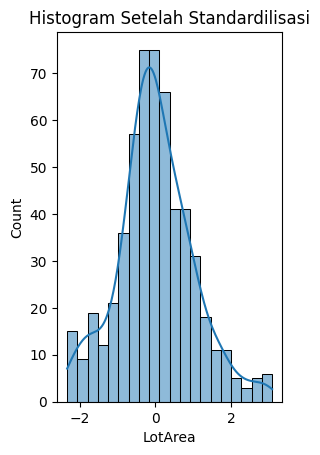

In [ ]:
plt.subplot(1,2,2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardilisasi")

In [ ]:
duplicates = df.duplicated()
print("baris duplikat")
print(df[duplicates])

baris duplikat
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


In [ ]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
  df_lencoder[col] = label_encoder.fit_transform(df[col])

df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


## Test_df

In [ ]:
# test_df.info()

In [ ]:
# test_df.describe(include='all')

In [ ]:
# missing_values = test_df.isnull().sum()
# missing_values[missing_values>0]

In [ ]:
# less = missing_values[missing_values < 1000].index
# over = missing_values[missing_values >= 1000].index

In [ ]:
# numeric_features = test_df.select_dtypes(include=['number']).columns
# test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

In [ ]:
# category_features = test_df.select_dtypes(include=['object']).columns
# for column in category_features:
#   test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

In [ ]:
# df = test_df.drop(columns=over)

In [ ]:
# missing_values = df.isnull().sum()
# missing_values[missing_values>0]

In [ ]:
# for features in numeric_features:
#   plt.figure(figsize=(10,6))
#   sns.boxplot(x=df[features])
#   plt.title(f'Box Plot of {features}')
#   plt.show()

In [ ]:
# q1 = df[numeric_features].quantile(0.25)
# q3 = df[numeric_features].quantile(0.75)
# IQR = q3 - q1

In [ ]:
# condition = ~((df[numeric_features] < (q1 - 1.5 * IQR)) | (df[numeric_features] > (q3 +1.5 *IQR))).any(axis=1)
# df_filtered_numeric = df.loc[condition, numeric_features]

# categorical_features = df.select_dtypes(include=['object']).columns
# df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [ ]:
# scaler = StandardScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.histplot(x=test_df[numeric_features[2]], kde=True)
# plt.title("Histogram sebelum Standardilisasi")

In [ ]:
# plt.subplot(1,2,2)
# sns.histplot(x=df[numeric_features[2]], kde=True)
# plt.title("Histogram Sesudah standardilisasi")

In [ ]:
# category_features = df.select_dtypes(include=['object']).columns

In [ ]:
# duplicates = df.duplicated()
# print('data duplicates')
# print(df[duplicates])

In [ ]:
# df_one_hot = pd.get_dummies(df, columns=category_features)
# df_one_hot

In [ ]:
# label_encoder = LabelEncoder()
# df_lencoder = pd.DataFrame(df)

# for col in category_features:
#   df_lencoder[col] = label_encoder.fit_transform(df[col])

# df_lencoder

# EDA

In [ ]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [ ]:
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / df_lencoder.shape[0]) * 100
missing_data = pd.DataFrame({
    'missing_values' : missing_values,
    'missing_percentage' : missing_percentage
}).sort_values(by='missing_percentage', ascending=False)

missing_data[missing_data['missing_values'] > 0]

,missing_values,missing_percentage


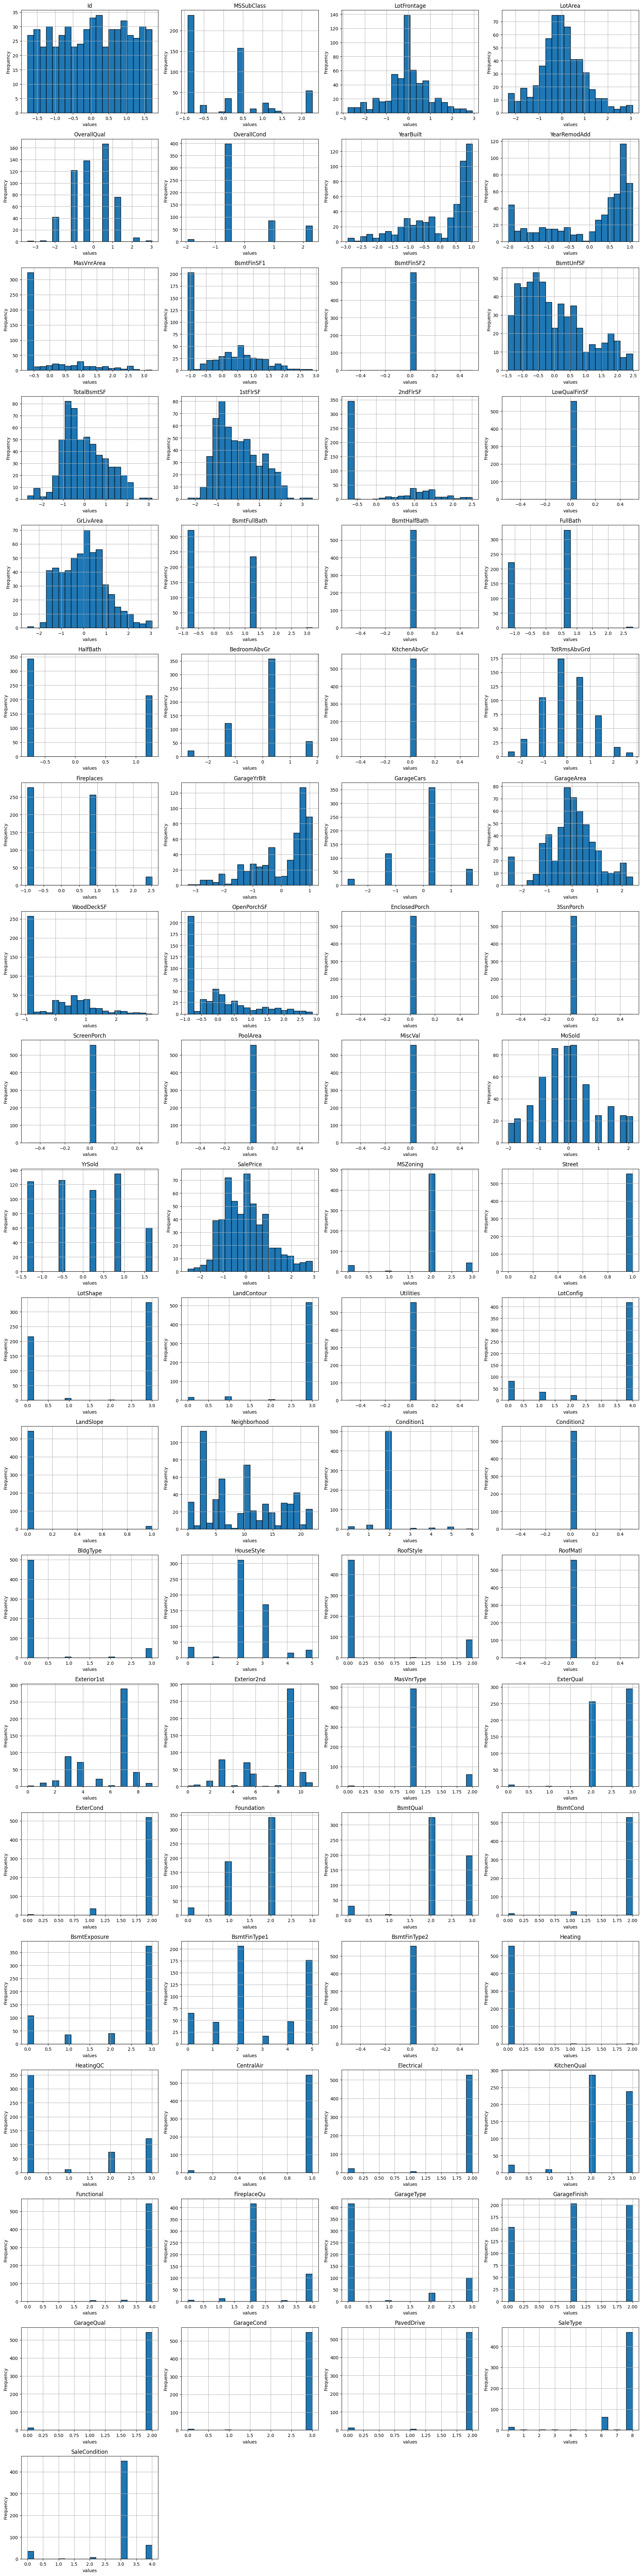

In [ ]:
num_var = df_lencoder.shape[1]
n_cols = 4
n_rows = -(-num_var // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, column in enumerate(df_lencoder.columns):
  df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('values')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

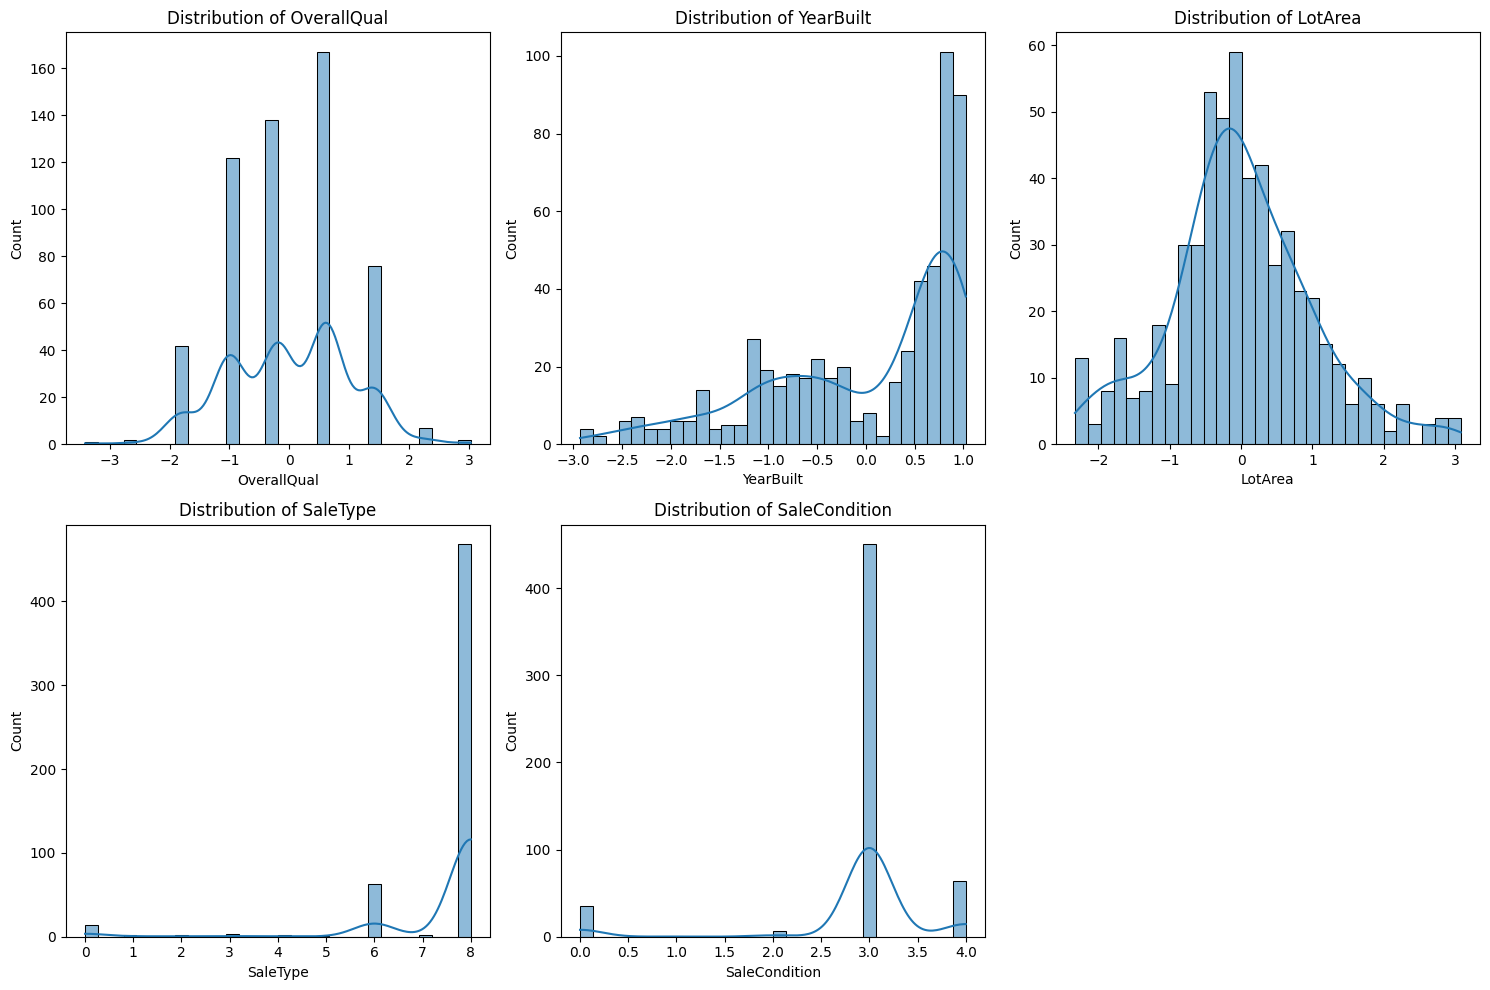

In [ ]:
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']
plt.figure(figsize=(15,10))

for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

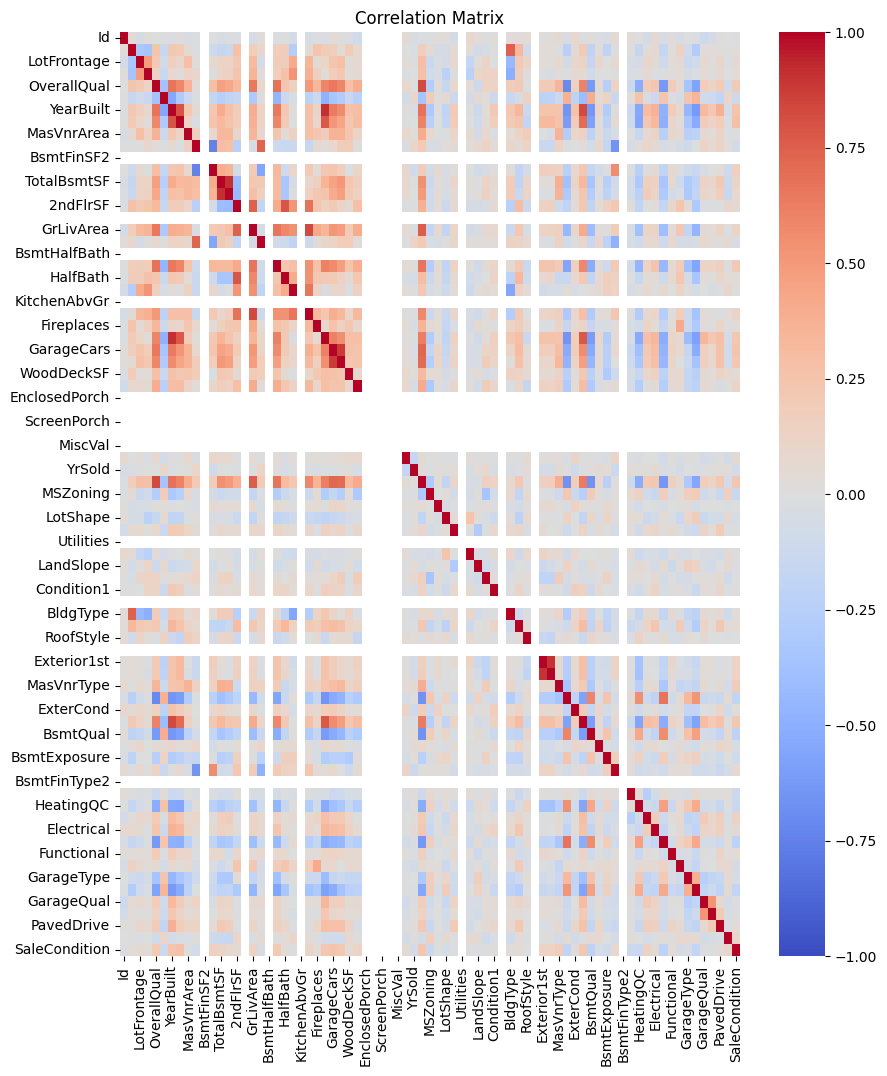

In [ ]:
plt.figure(figsize=(10,12))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

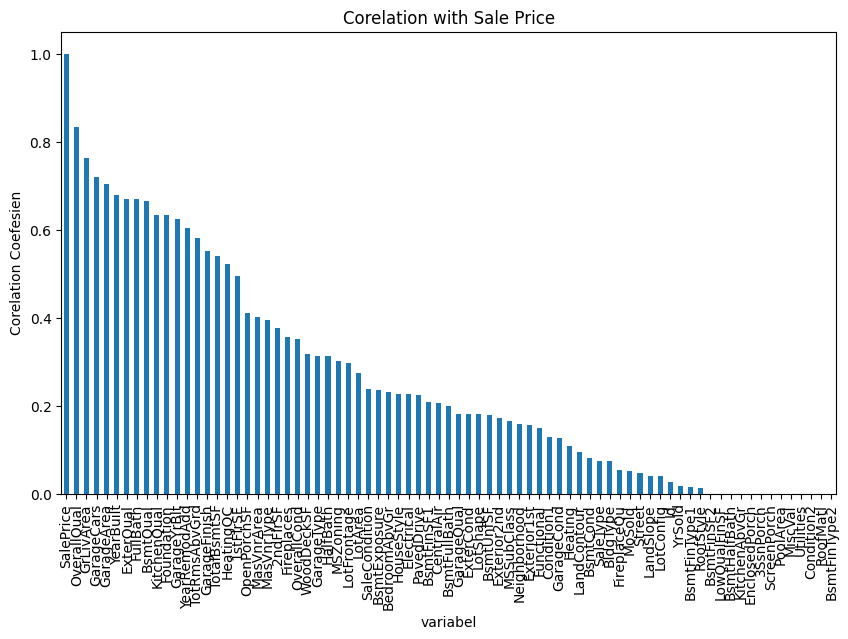

In [ ]:
target_corr = df_lencoder.corr()['SalePrice']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
plt.figure(figsize=(10,6))
target_corr_sorted.plot(kind='bar')
plt.title('Corelation with Sale Price')
plt.xlabel('variabel')
plt.ylabel('Corelation Coefesien')
plt.show()

# Data Spliting

In [ ]:
x = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print(f'Jumlah Data: {len(x)}')
print(f'Jumlah Data Latih: {len(x_train)}')
print(f'Jumlah Data Test: {len(x_test)}')

Jumlah Data: 557
Jumlah Data Latih: 445
Jumlah Data Test: 112


# Modelling

## Training

In [ ]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

## Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE' : [mae_lars],
    'MSE' : [mse_lars],
    'R2' : [r2_lars]
}

df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517


In [ ]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
df_results.loc['Linear regresion'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear regresion,0.237356,0.095778,0.880690


In [ ]:
# Evaluasi pada model GBR
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear regresion,0.237356,0.095778,0.880690
GradientBoostingRegressor,0.217272,0.089125,0.888976


In [ ]:
import joblib
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

In [ ]:
import pickle
with open('gbr_model.pkl', 'wb') as file:
  pickle.dump(GBR, file)

# Deployment & Monitoring

In [ ]:
# Memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')

In [ ]:
with open('gbr_model.pkl', 'rb') as file:
  pickle_model = pickle.load(file)

In [ ]:
app = Flask(__name__)
joblib_model = joblib.load('gbr_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
  data = request.json['data']
  prediction = joblib_model.predict(data)
  return jsonify({'prediction': prediction.to_list()})

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
{
    "data": [[ 2.58814198e-02, -9.17637181e-01,  7.98581973e-01,
    4.65818252e-03, -1.90862680e-01, -5.23676539e-01,
    5.44502437e-01,  3.98055532e-01, -7.01765886e-01,
    1.84842886e+00,  0.00000000e+00, -7.99528238e-01,
    1.40061034e+00,  1.30453595e+00, -7.43485947e-01,
    0.00000000e+00,  1.75076143e-01,  1.15778146e+00,
    0.00000000e+00,  7.87362373e-01, -7.89877652e-01,
    2.94736730e-01,  0.00000000e+00, -2.35844028e-01,
   -9.44263321e-01,  4.99353260e-01,  2.73711363e-01,
    5.33168369e-01,  7.90365547e-01, -3.15583095e-01,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  2.51894504e-01,
   -1.35256152e+00,  2.00000000e+00,  1.00000000e+00,
    0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
    4.00000000e+00,  0.00000000e+00,  3.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    7.00000000e+00,  9.00000000e+00,  1.00000000e+00,
    3.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
    2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    2.00000000e+00,  4.00000000e+00,  2.00000000e+00,
    0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    3.00000000e+00,  2.00000000e+00,  8.00000000e+00,
    3.00000000e+00]]
  }

{'data': [[0.0258814198,
   -0.917637181,
   0.798581973,
   0.00465818252,
   -0.19086268,
   -0.523676539,
   0.544502437,
   0.398055532,
   -0.701765886,
   1.84842886,
   0.0,
   -0.799528238,
   1.40061034,
   1.30453595,
   -0.743485947,
   0.0,
   0.175076143,
   1.15778146,
   0.0,
   0.787362373,
   -0.789877652,
   0.29473673,
   0.0,
   -0.235844028,
   -0.944263321,
   0.49935326,
   0.273711363,
   0.533168369,
   0.790365547,
   -0.315583095,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.251894504,
   -1.35256152,
   2.0,
   1.0,
   0.0,
   3.0,
   0.0,
   4.0,
   0.0,
   3.0,
   2.0,
   0.0,
   0.0,
   2.0,
   0.0,
   0.0,
   7.0,
   9.0,
   1.0,
   3.0,
   1.0,
   2.0,
   2.0,
   2.0,
   1.0,
   2.0,
   0.0,
   0.0,
   0.0,
   1.0,
   2.0,
   2.0,
   4.0,
   2.0,
   0.0,
   1.0,
   2.0,
   3.0,
   2.0,
   8.0,
   3.0]]}